<a href="https://colab.research.google.com/github/fabianslo108/reference_letters/blob/main/data_processing/RL_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This NB does some data wrangling.
It starts with a Gsheet with the list of candidates

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from pprint import pprint

----
# Load Candidates Data
----

In [3]:
RL_path = "/content/drive/MyDrive/RL"
candidates = pd.read_excel(join(RL_path, "candidates.xlsx"))

In [4]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     650 non-null    int64  
 1   Year                   650 non-null    int64  
 2   First Name             650 non-null    object 
 3   Last Name              645 non-null    object 
 4   PhD university         645 non-null    object 
 5   PhD department         645 non-null    object 
 6   PhD years              645 non-null    float64
 7   Field                  645 non-null    object 
 8   Gender                 645 non-null    object 
 9   Citizenship            645 non-null    object 
 10  Undergraduate Country  645 non-null    object 
 11  Personal website       630 non-null    object 
 12  Email                  589 non-null    object 
 13  Publications good      644 non-null    float64
 14  Publications bad       644 non-null    float64
 15  Ref1  

In [ ]:

# Regions
def assign_citizenship(country):
  """
  Assign region:
   - north america
   - other america
   - other asian
   - western europe
   - eastern europe
   - russia
   - former soviet
   - china
   - africa
  """
  if country == "":
    return ""
  elif country in ("USA", "Canada", ):
    return "North America"
  elif country in ("Brazil", "Argentina", "Uruguay", "Mexico",
                   "Bolivia", "Peru", "Chile", "Colombia", "Ecuador", "Venezuela",
                   "El Salvador", "Guatemala", "Costa Rica"):
    return "Other America"
  elif country in ("Korea", "Australia", "Singapore", "India", "Iran", "Pakistan",
                   "Vietnam", "Thailand", "New Zealand", "Taiwan", "Japan", "Malaysya", "Malaysia",
                   "Israel", "Sri Lanka", "Bangladesh", "Philipines", "Philippines"):
    return "Other Asian"
  elif country in ("UK", "Ireland", "Spain", "France", "Netherlands", "Luxembourg",
                   "Germany", "Italy", "Norway", "Sweden", "Belgium", "Austria", "Finland",
                   "Switzerland", "Denmark", "Portugal", "Iceland"):
    return "Western Europe"
  elif country in ("Hungary", "Czech Republic", "Greece", "Turkey", "Poland",
                   "Bulgaria", "Croatia", "Slovakia", "Slovak Republic", "Romania",
                   "Serbia", "Macedonia", "Albania"):
    return "Eastern Europe"
  elif country == "Russia":
    return "Russia"
  elif country in ("Belarus", "Ukraine", "Lithuania", "Latvia", "Armenia",
                   "Kyrgystan", "Kazakhstan", "Azerbaijan"):
    return "Former Soviet"
  elif country == "China":
    return "China"
  else:
    return "Africa"

candidates["Nationality"] = candidates['Citizenship'].apply(assign_citizenship)
candidates["Nationality"] = pd.Categorical(candidates["Nationality"])

candidates["Univ Rank cat"]=pd.cut(candidates["Univ_rank"], bins=[0,10,25,50,100,150,200,1500],labels=['Top 10','10-25','25-50','50-100','100-150','150-200','200+'])

# Regions
def assign_region(country):
  if country == "":
    return ""
  elif country == "USA":
    return "USA"
  elif country in ("UK", "Ireland", "Australia", "Singapore", "Canada"):
    return "English Speaking"
  elif country in ("Spain", "France", "Netherlands", "Luxembourg", "Germany",
                   "Italy", "Norway", "Sweden", "Belgium", "Austria", "Finland",
                   "Switzerland", "Denmark", "Portugal", "Hungary",
                   "Czech Republic", "Greece", "Turkey"):
    return "Europe"
  else:
    return "Other"

candidates["Univ_region"] = candidates['Univ_country'].apply(assign_region)
candidates["Univ_region"] = pd.Categorical(candidates["Univ_region"])

nobs = candidates.groupby(['Univ_region'])['I_research'].agg(['count'])
nobs["count"] = nobs["count"].apply(lambda n: "n: " + str(n))
nobs["count"]



In [ ]:
candidates.head(2)

,ID,Year,First Name,Last Name,PhD university,PhD department,PhD years,Field,Gender,Citizenship,...,Job_code,Job_sector,Job_country,Job_Trank,Job_Prank,Job_Rrank,I_research,Nationality,Univ Rank cat,Univ_region
0,10001,2010,Moustafa,Abu EL Fadl,Old Dominion University,Finance,6.0,Finance,Male,Egypt,...,1271.0,Academia,USA,462.0,NaN,NaN,0,Africa,200+,USA
1,10002,2010,Victor,Archavski,New York University,Economics,7.0,Finance,Male,Russia,...,1177.0,Academia,Russia,855.0,NaN,NaN,0,Russia,Top 10,USA


In [ ]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     650 non-null    int64   
 1   Year                   650 non-null    int64   
 2   First Name             650 non-null    object  
 3   Last Name              645 non-null    object  
 4   PhD university         645 non-null    object  
 5   PhD department         645 non-null    object  
 6   PhD years              645 non-null    float64 
 7   Field                  645 non-null    object  
 8   Gender                 645 non-null    object  
 9   Citizenship            645 non-null    object  
 10  Undergraduate Country  645 non-null    object  
 11  Personal website       630 non-null    object  
 12  Email                  589 non-null    object  
 13  Publications good      644 non-null    float64 
 14  Publications bad       644 non-null    flo

---
# Some Plots
---

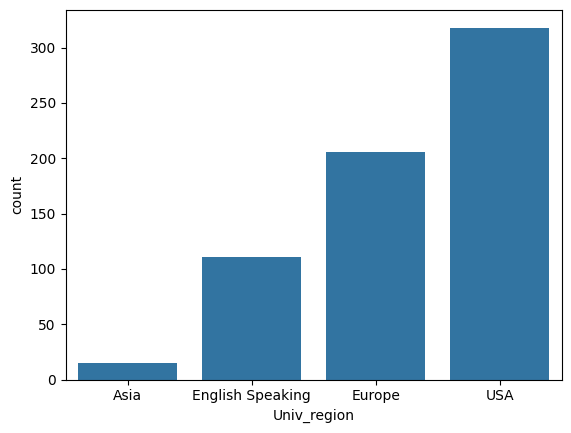

In [ ]:
sns.countplot(data=candidates, x="Univ_region");

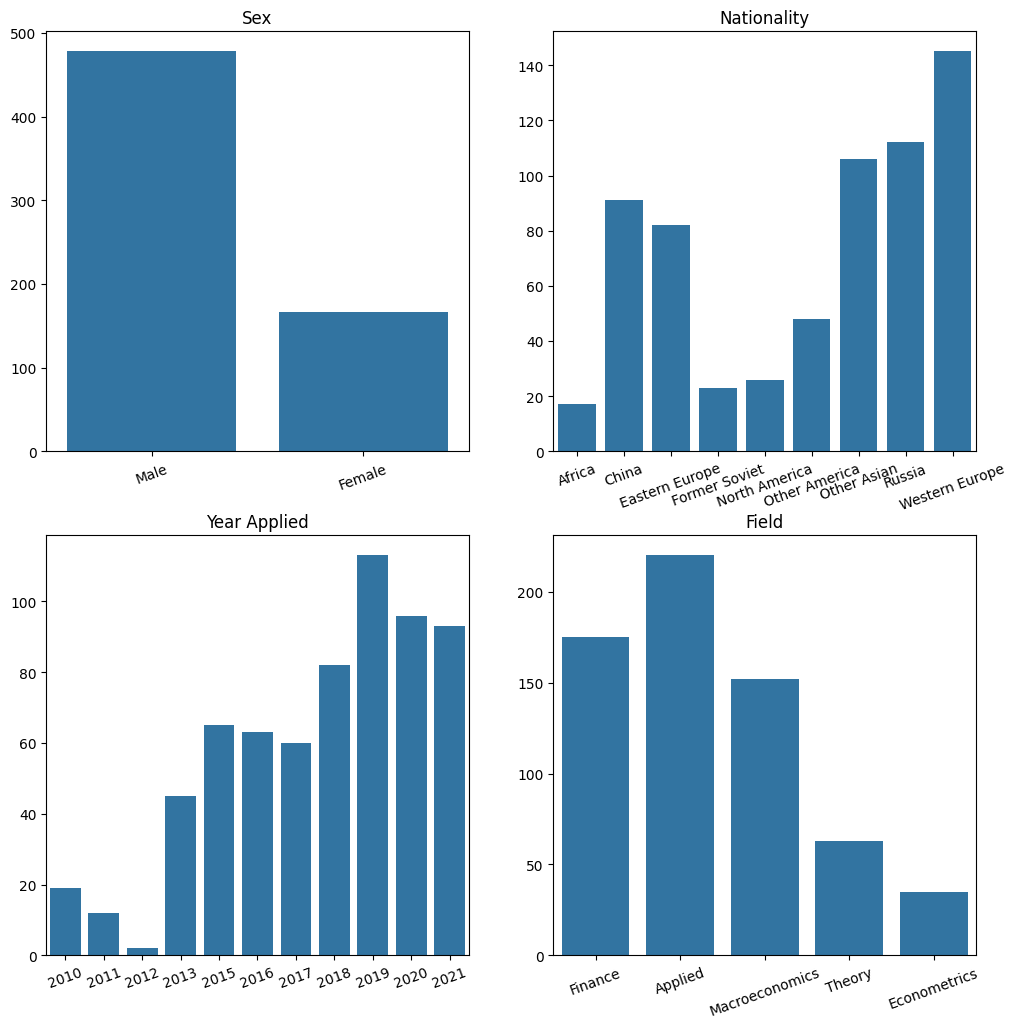

In [ ]:
# Set the figure size
figure, axes = plt.subplots(2, 2, figsize=(12,12), sharey=False, squeeze=False,)
axes[0,0].set_title('Sex')
axes[0,1].set_title('Nationality')
axes[1,0].set_title('Year Applied')
axes[1,1].set_title('Field')
sns.countplot(ax=axes[0,0], data=candidates, x="Gender");
sns.countplot(ax=axes[0,1], data=candidates, x="Nationality");
sns.countplot(ax=axes[1,0], data=candidates, x="Year");
sns.countplot(ax=axes[1,1], data=candidates, x="Field");
for x, y in ((0,0),(0,1),(1,0),(1,1)):
  axes[x,y].tick_params(axis='x', rotation=20,  );
  axes[x,y].set(xlabel='', ylabel='')


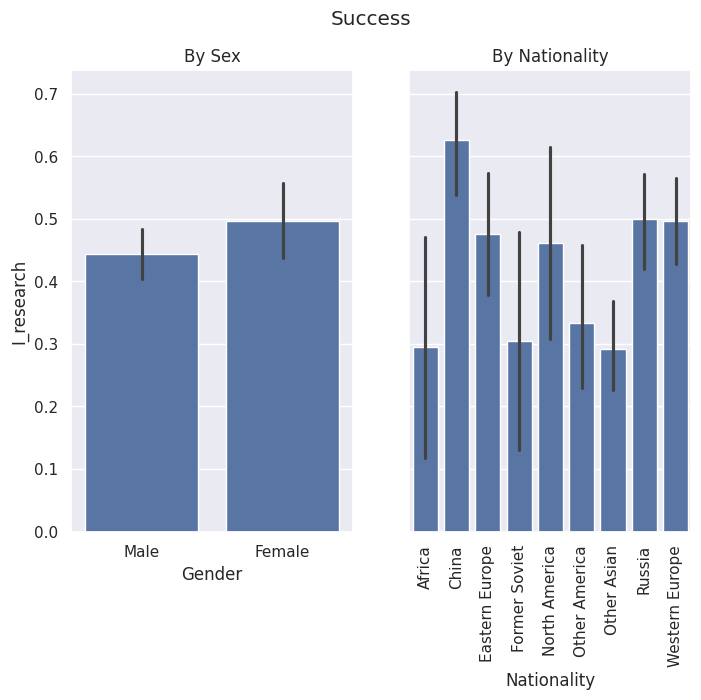

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
figure, axes = plt.subplots(1, 2, figsize=(8,6), sharey=True)
figure.suptitle('Success')
axes[0].set_title('By Sex')
axes[1].set_title('By Nationality')

# Gender
sns.barplot(x="Gender", y="I_research", data=candidates, ax=axes[0],
    estimator="mean", errorbar=("ci", 90));

# Nationality
sns.barplot(x="Nationality", y="I_research", data=candidates, ax=axes[1],
    estimator="mean", errorbar=("ci", 90));
axes[1].tick_params(axis='x', rotation=90);

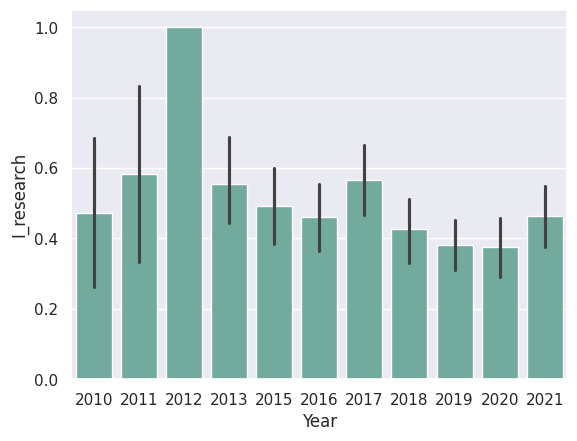

In [ ]:
# plot a bar chart
sns.barplot(
    x="Year",
    y="I_research",
    data=candidates,
    estimator="mean",
    errorbar=("ci", 90),
    color='#69b3a2');

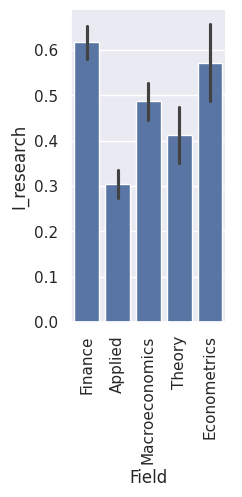

In [ ]:
ax = sns.catplot(
    data=candidates, x="Field", y="I_research",# col="Gender",
    kind="bar", height=4, aspect=.6, errorbar="se");
ax.tick_params(axis='x', rotation=90);

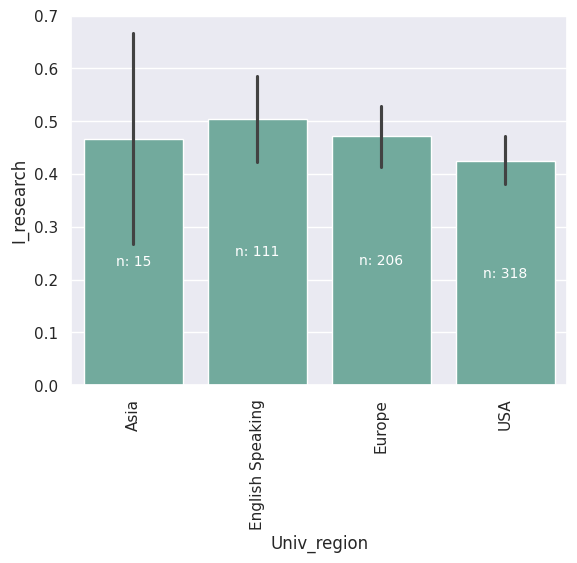

In [ ]:
nobs = candidates.groupby(['Univ_region'])['I_research'].agg(['count'])
nobs["count"] = nobs["count"].apply(lambda n: "n: " + str(n))
nobs["count"]

ax = sns.barplot(
    x="Univ_region",
    y="I_research",
    data=candidates,
    estimator="mean",
    errorbar=("ci", 90),
    color='#69b3a2');
ax.tick_params(axis='x', rotation=90);

for container in ax.containers:
  ax.bar_label(container, labels=nobs["count"], label_type='center', fontsize=10, color='white')


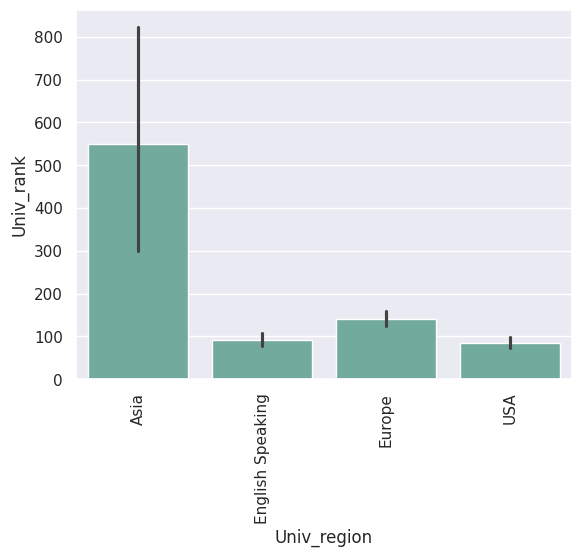

In [ ]:
ax = sns.barplot(
    x="Univ_region",
    y="Univ_rank",
    data=candidates,
    estimator="mean",
    errorbar=("ci", 90),
    color='#69b3a2');
ax.tick_params(axis='x', rotation=90);


- Violin style plot: tenure track vs. post-docs vs. industry+ (univ ranking)


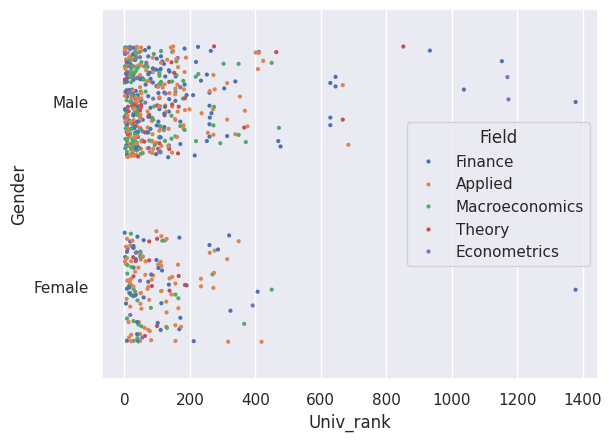

In [ ]:
sns.stripplot(data=candidates.dropna(subset=['Gender', 'Field']), x="Univ_rank", y="Gender", hue="Field", size=3, jitter=0.3);

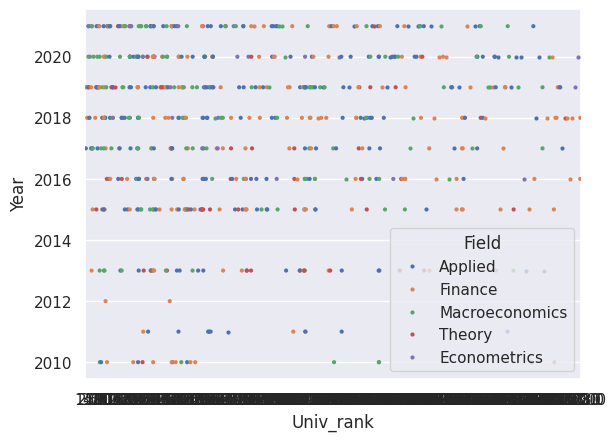

In [ ]:
sns.stripplot(data=candidates.dropna(subset=['Year', 'Field']), x="Univ_rank", y="Year", hue="Field", size=3, jitter=0.4);

<ipython-input-8-3b1b0a54cbcc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Univ_rank", y="I_research", data=candidates, width=.6, palette="Set2", orient="h");


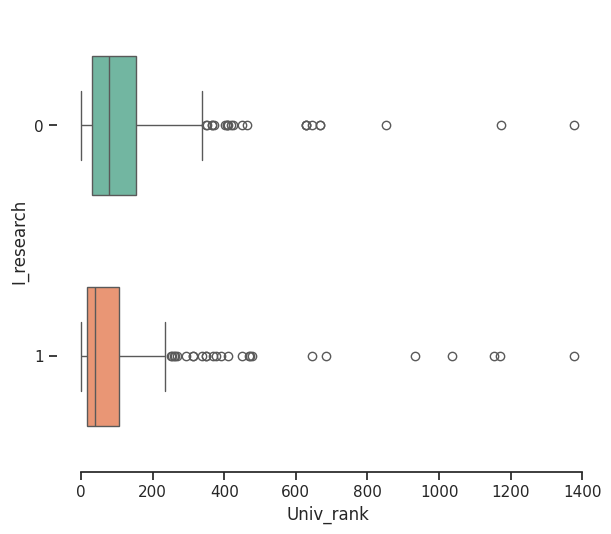

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
# plot
sns.boxplot(x="Univ_rank", y="I_research", data=candidates, width=.6, palette="Set2", orient="h");
sns.despine(trim=True, left=True)

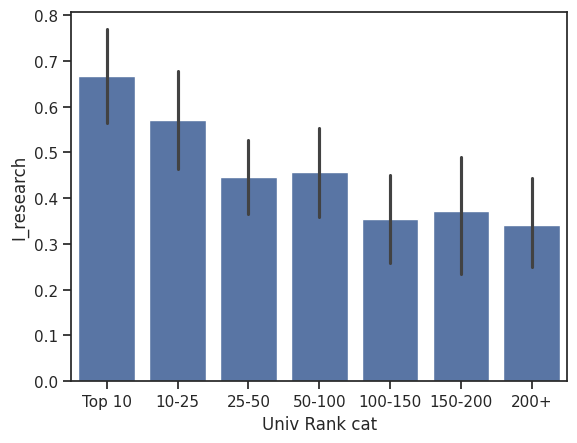

In [ ]:
sns.barplot(data=candidates, x="Univ Rank cat", y="I_research", orient='v',);

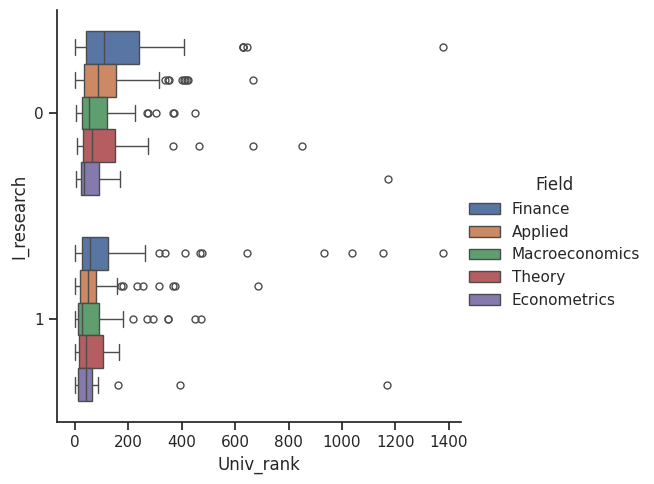

In [ ]:
sns.catplot(data=candidates, x="Univ_rank", y="I_research", kind="box", orient='h', hue='Field');

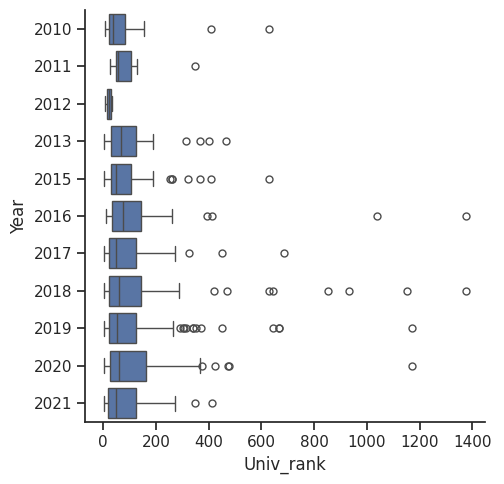

In [ ]:
sns.catplot(data=candidates, x="Univ_rank", y="Year", kind="box", orient='h');

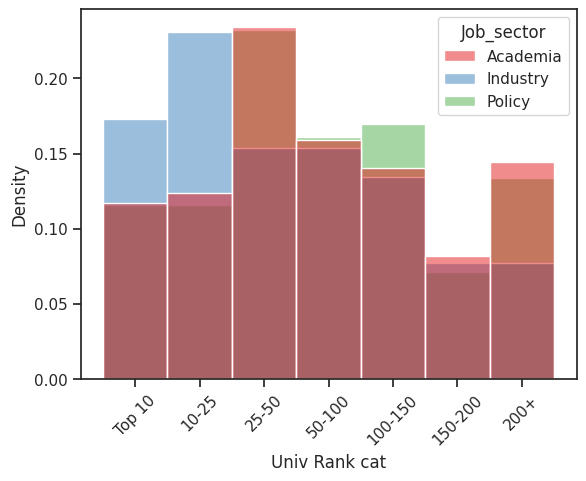

In [ ]:
ax = sns.histplot(candidates, x="Univ Rank cat", hue="Job_sector", stat="density", binwidth=30,
                  common_norm=False, palette="Set1",cumulative=False, common_bins=False);
ax.tick_params(axis='x', rotation=45);

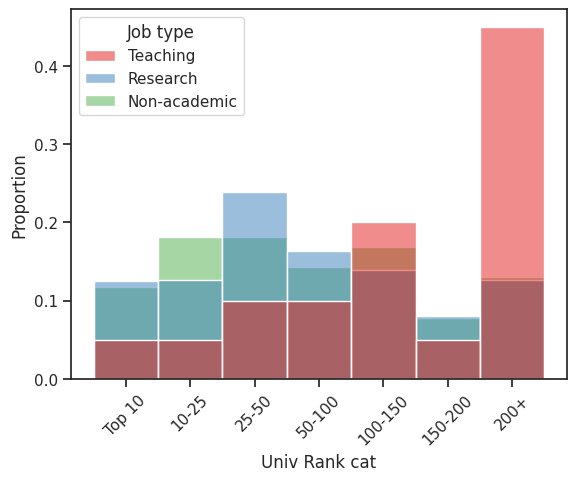

In [ ]:
ax = sns.histplot(candidates, x="Univ Rank cat", hue="Job type", stat="proportion", binwidth=30, common_norm=False, palette="Set1");
ax.tick_params(axis='x', rotation=45);

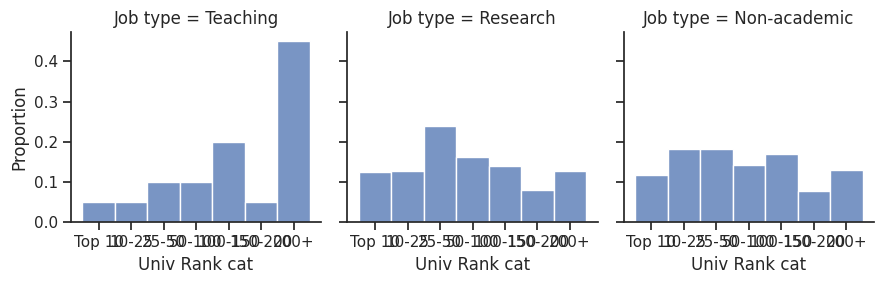

In [ ]:
g = sns.FacetGrid(candidates, col="Job type");
g.map(sns.histplot, "Univ Rank cat", binwidth=30, stat="proportion");

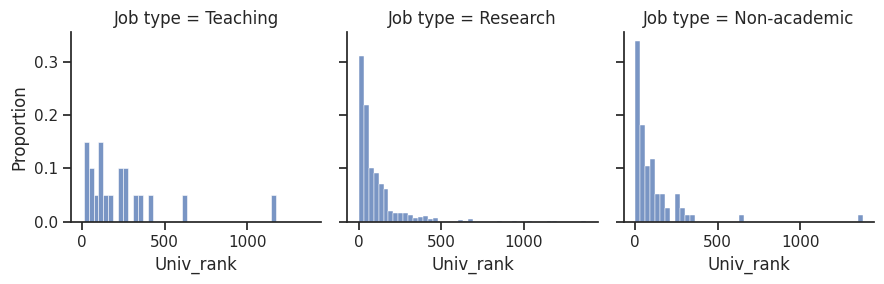

In [ ]:
g = sns.FacetGrid(candidates, col="Job type");
g.map(sns.histplot, "Univ_rank", binwidth=30, stat="proportion");

* Academic research - Academic teaching/postdoc - Policy Research - Other

---
# Testing different sentiment methods
---

- Load letter
- Compute basic stats
- Load a dict based method - compute sentiment
- Load transformer - compute sentiment
- Compute other scores

In [ ]:
from io import StringIO
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import re
from pprint import pprint

In [ ]:
# This package has Harvard Inquirer and Loughran and McDonald Financial Sentiment Dictionaries
!pip install pysentiment2 --quiet
import pysentiment2 as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00


In [ ]:
text = """This is a brilliant demonstration.

 Or it may be a horrible idea. What do you think, friend?

 It is silly to consider it.
 """

# The tokenizer filters terms in the dictionary into a list
# The get_score function counts the number of positive and negative valence tokens
# Polarity = (pos-neg)/(pos+neg)
# Subjectivity = (pos+neg)/total

# Harvard General Inquirer IV-4 dictionary
hiv4 = ps.HIV4()
tokens = hiv4.tokenize(text)  # text can be tokenized by other ways
print(f"{tokens=}")
score = hiv4.get_score(tokens)
print(f"harvard inquirer {score=}")

# Loughran and McDonald dictionary
lm = ps.LM()
tokens = lm.tokenize(text)
print(f"{tokens=}")
score = lm.get_score(tokens)
print(f"LM {score=}")

tokens=['brilliant', 'demonstr', 'horribl', 'idea', 'think', 'silli', 'consid']
harvard inquirer score={'Positive': 2, 'Negative': 2, 'Polarity': 0.0, 'Subjectivity': 0.57142848979593}
tokens=['brilliant', 'demonstr', 'horribl', 'idea', 'think', 'silli', 'consid']
LM score={'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.1428571224489825}


In [ ]:
# natural language toolkit
!pip install nltk --quiet
import nltk
nltk.download('all', quiet=True)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# Vader
# Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.
# Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
    "The book was good.",         # positive sentence
    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
    "A really bad, horrible book.",       # negative sentence with booster words
    "At least it isn't a horrible book.", # negated negative sentence with contraction
    ":) and :D",     # emoticons handled
    "",              # an empty string is correctly handled
    "Today sux",     #  negative slang handled
    "Today sux!",    #  negative slang with punctuation emphasis handled
    "Today SUX!",    #  negative slang with capitalization emphasis
    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
  ]

paragraph = "It was one of the worst movies I've seen, despite good reviews. \
 Unbelievably bad acting!! Poor direction. VERY poor production. \
 The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"
lines_list = sent_tokenize(paragraph)
sentences.extend(lines_list)
tricky_sentences = [
   "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "I like to hate Michael Bay films, BUT I couldn't help but fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
    under orders and in the ''least offensive way possible.''"
 ]
sentences.extend(tricky_sentences)

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
At least it isn't a horrible book.
compound

In [ ]:
# Senticnet
# Another sentiment method (captures intensity and sinonimity)
# But works with single words
!pip install senticnet --quiet
from senticnet.senticnet import SenticNet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 MB 3.9 MB/s eta 0:00:00


In [ ]:
sn = SenticNet()
sn.concept("forgettable")['polarity_label']

'negative'

---
# RefLetters class
---

In [ ]:
import torch as pt

class RefLetters:
  '''
  Class to represent reference letters
  '''

  RL_path = "/content/drive/MyDrive/RL"

  def __init__(self, row, encoding='utf8', df=candidates):
    if isinstance(row, (dict, pd.DataFrame, pd.Series)):
      self.year = row['Year']
      self.first_name = row['First Name']
      self.last_name = row['Last Name']
      self.id = row['ID']
    elif isinstance(row, int):
      self.id = row
      self.first_name = df.loc[df['ID']==row, 'First Name'].to_numpy()[0]
      self.last_name = df.loc[df['ID']==row, 'Last Name'].to_numpy()[0]
      self.year = df.loc[df['ID']==row, 'Year'].to_numpy()[0]
    else:
      raise Exception("Either dict or int")

    self.path = join(join(RefLetters.RL_path, str(self.year)), str(self.id))
    self.adviser_letter = False
    self.n_letters = 0
    self.letters = {1:dict(), 2:dict(), 3:dict(), 4:dict()}
    self.read_letters(encoding=encoding)

  def read_letters(self, encoding):
    for l in self.letters.keys():
      try:
        # Try short version first
        filename = f"RL_{l}s.txt"
        with open(join(self.path, filename), 'r', encoding=encoding, errors='ignore') as infile:
          if encoding != 'utf8':
            print(f"{encoding=}")
          self.letters[l]["text"] = infile.read()
        if l==1:
          self.adviser_letter = True
        self.n_letters += 1
      except FileNotFoundError as e:
        try:
          filename = f"RL_{l}.txt"
          with open(join(self.path, filename), 'r', encoding=encoding, errors='ignore') as infile:
            if encoding != 'utf8':
              print(f"{encoding=}")
            self.letters[l]["text"] = infile.read()
          if l==1:
            self.adviser_letter = True
          self.n_letters += 1
        except FileNotFoundError as e:
          self.letters[l]["text"] = ""
        except UnicodeError as e:
          self.letters[l]["text"] = ""

  def read_file(self, filename):
    if not filename.endswith('.txt'):
      filename += '.txt'
    try:
      with open(join(self.path, filename), 'r', encoding='utf8', errors='ignore') as infile:
        self.extra = infile.read()
    except FileNotFoundError as e:
      print("File not found")

  def __repr__(self):
    return f"Letters for candidate #{self.id}"

  def __str__(self):
    text = f"""
    -------------------------------
    Candidate {self.id}: {self.first_name} {self.last_name}
    Adviser's letter: {"Yes" if self.adviser_letter else "No"}
    Number of letters: {self.n_letters}
    -------------------------------
    """
    for k, letter in self.letters.items():
      if letter['text']:
        text += f"""
        Letter {k}: \"{letter["text"][:50]} ...\"
        """
    return text

  def get_letters(self):
    letters = []
    for letter in self.letters.values():
      if letter['text']:
        letters.append(letter['text'])
    return letters

  def get_stats(self, stats):
    from copy import deepcopy
    s = {1:dict(), 2:dict(), 3:dict(), 4:dict()}
    for l in s.keys():
      s[l] = {stat: self.letters[l].get(stat, None) for stat in stats}
    return s

In [ ]:
def utf16_to_utf8(year, id, letter):
  RL_path = "/content/drive/MyDrive/RL"
  path = join(join(RL_path, str(year)), str(id))
  filename = f"RL_{letter}.txt"
  source_path = join(path, filename)
  filename = f"RL_{letter}s.txt"
  dest_path = join(path, filename)
  try:
    with open(source_path, "rb") as source:
      print(f"Opened {source_path}")
      with open(f"{dest_path}", "wb") as dest:
        print(f"Opened {dest_path}")
        dest.write(source.read().decode("utf-16").encode("utf-8"))
  except FileNotFoundError as e:
    print(e)


In [ ]:
#utf16_to_utf8(2013, 13013, 1)

Opened /content/drive/MyDrive/RL/2013/13013/RL_1.txt
Opened /content/drive/MyDrive/RL/2013/13013/RL_1s.txt


---
# RLSentimentAnalyzer class
---

In [ ]:
!pip install pysentiment2 --quiet
import pysentiment2 as ps

!pip install nltk --quiet
import nltk
nltk.download('all', quiet=True)
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer

!pip install senticnet --quiet
from senticnet.senticnet import SenticNet

from collections import Counter
import re
import numpy as np
import pandas as pd
from math import floor, ceil

class RLSentimentAnalyzer:
  '''
  Class containing all sentiment analysis tools
  1. Basic linguistic stats
  2. Sentiment from dictionary methods
  3. Sentiment from senticnet
  4. Zero-shot techniques
  '''

  hiv4 = ps.HIV4()   # Harvard general inquirer obj
  lm = ps.LM()       # Loughran and McDonald obj

  sn = SenticNet()   # Senticnet obj

  # NLTK
  lemmatizer = WordNetLemmatizer()   # wordnet lemmatizer: dogs-->dog
  sentence_split = nltk.data.load('tokenizers/punkt/english.pickle')   # nltk sentence
  sid = SentimentIntensityAnalyzer()    # Vader sentiment
  stopwords = nltk.corpus.stopwords.words("english")

  #nli_ckpt = 'facebook/bart-large-mnli'
  #nli_tokenizer = BartTokenizer.from_pretrained(nli_ckpt)
  #nli_pipe = pipeline("zero-shot-classification", model=nli_ckpt, device=0)


  def __init__(self):
    pass

  def compute_stats(self, letters):
    '''
    Computes basic linguistic and sentiment stats

    - letters: RefLetters obj with letters dict attribute
    '''
    for l, d in letters.letters.items():
      text = d['text']
      if not text:
        continue
      #print(f"Letter {l}")
      d["word_count"] = len(self.filter_punctuation(text))
      paragraphs = self.extract_paragraphs(text)
      d["par_count"] = len(paragraphs)

      sentences = [RLSentimentAnalyzer.sentence_split.tokenize(p) for p in paragraphs]
      sentences = [sentence for par in sentences for sentence in par]
      d["sentence_count"] = len(sentences)
      #print()

      d["HGI_polarity"] = self.get_hgi_score(text)
      d["LM_polarity"] = self.get_LM_score(text)

      senticnet_polarity = []
      vader_polarity = []

      for sentence in sentences:
        preprocessed_sentence = self.preprocess_text(sentence.strip())
        vader_polarity.append(RLSentimentAnalyzer.sid.polarity_scores(preprocessed_sentence)['compound'])
        words = sentence.split(' ')
        for word in words:
          result = self.search_SenticNet(word)
          if result is not None:
            senticnet_polarity.append(float(result['polarity_value']))

      # TODO:
      d["vader_polarity"] = np.array(vader_polarity).mean() if len(vader_polarity)>0 else None
      d['senticnet_polarity'] = np.array(senticnet_polarity).mean() if len(senticnet_polarity)>0 else None


  def filter_punctuation(self, text):
    '''Returns list of word-like tokens in sentence or phrase'''
    nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
    tokens = nltk.tokenize.word_tokenize(text)   # nltk tokenizer
    filtered = [w for w in tokens if nonPunct.match(w)]
    return filtered

  def extract_paragraphs(self, text):
    '''Returns list of paragraphs'''
    paragraphs = []
    text = re.sub(r'\n+', '\n', text).strip()
    for p in text.split("\n"):
      paragraphs.append(p)
    return paragraphs

  def get_hgi_score(self, text):
    # Harvard General Inquirer IV-4 dictionary
    tokens = RLSentimentAnalyzer.hiv4.tokenize(text)  # text can be tokenized by other ways
    score = RLSentimentAnalyzer.hiv4.get_score(tokens)
    return score['Polarity']

  def get_LM_score(self, text):
    # Loughran and McDonald dictionary
    tokens = RLSentimentAnalyzer.lm.tokenize(text)
    score = RLSentimentAnalyzer.lm.get_score(tokens)
    return score['Polarity']

  def get_wordnet_pos(self, word):
    '''
    get word type from nltk wordnet
    default is noun
    '''
    try:
      tag = wordnet.synsets(word)[0].pos()
    except:
      tag = 'n'
    tag_dict = {"a": wordnet.ADJ, "n": wordnet.NOUN, "v": wordnet.VERB, "r": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

  def search_SenticNet(self, word):
    try:
      output = RLSentimentAnalyzer.sn.concept(word)
    except:
      try:
        word = RLSentimentAnalyzer.lemmatizer.lemmatize(word, self.get_wordnet_pos(word))
        output = RLSentimentAnalyzer.sn.concept(word)
      except:
        return None
    return output


  def preprocess_text(self, text, return_string=True):
    # Tokenize
    tokens = nltk.tokenize.word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in RLSentimentAnalyzer.stopwords]
    # Lemmanize tokens
    lemmatized_tokens = [RLSentimentAnalyzer.lemmatizer.lemmatize(token, self.get_wordnet_pos(token)) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens) if return_string else lemmatized_tokens


  def apply_NLI(self, labels=['bad', 'good', 'excellent', 'exceptional'], template="This candidate is {}.", multi_label=True, max_length=950, stride=50):
    """ NLI
    """
    for l in self.letters.keys():
      print(f"{l=}")
      letter = self.letters[l]
      if letter.get("text", "") == "":
        continue
      text = letter["text"]
      tokenized = Candidate.nli_tokenizer(text, return_overflowing_tokens=True, truncation=True, max_length=12000, stride=0,
                              add_special_tokens=False, return_token_type_ids=False, return_attention_mask=False, return_length=True)

      length = tokenized['length']
      input_ids = tokenized['input_ids']
      st = 0
      window = 0
      step = floor(length/(ceil(length/max_length)))
      end = st + step

      while st < length:
        window +=1
        print(window, st, end=", ")
        print(end)

        # pose sequence as a NLI premise and label as a hypothesis
        premise = RLSentimentAnalyzer.nli_tokenizer.decode(input_ids[st:end])
        nli_res = RLSentimentAnalyzer.nli_pipe(premise, labels, hypothesis_template=template, multi_label=multi_label)
        print(nli_res['labels'])
        print(nli_res['scores'])

        st = end - stride
        end = st + step



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 MB 31.1 MB/s eta 0:00:00


In [ ]:
# gather stats
stats_lst = []
for index, row in candidates.loc[:3].iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  refletters = RefLetters(row)
  #print(refletters)
  #analyzer = RLSentimentAnalyzer()
  #analyzer.compute_stats(refletters)
  #stats = pd.DataFrame(refletters.get_stats())
  #stats_lst.append(stats.T.stack(level=-1).to_frame(name=refletters.id).T)
  #pprint(stats)

stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df["ID"] = stats_df.index
stats_df.info()

10001, 
10002, 10003, 10004, 

In [ ]:
res_df = pd.merge(candidates, stats_df, on="ID", how="left")

In [ ]:
res_df.info()

In [ ]:
# Save results
res_df.to_excel(join(RL_path, "candidates_results1.xlsx"), sheet_name='linguistic_stats', index=False)

---
# Some analysis of stats
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
RL_path = "/content/drive/MyDrive/RL"
res_df = pd.read_excel(join(RL_path, "candidates_results4.xlsx"))

In [ ]:
anal_df = res_df.query('RL1_word_count>0 and RL2_word_count>0')

In [ ]:
anal_df[["RL1_word_count","RL2_word_count","RL3_word_count","RL4_word_count"]].describe()

,RL1_word_count,RL2_word_count,RL3_word_count,RL4_word_count
count,603.000000,603.000000,552.000000,140.000000
mean,1226.235489,941.721393,859.891304,802.992857
std,600.347788,496.075809,462.573852,466.193270
min,188.000000,129.000000,96.000000,165.000000
25%,787.000000,594.000000,554.500000,437.750000
50%,1135.000000,845.000000,766.000000,714.000000
75%,1540.000000,1176.500000,1080.250000,1057.000000
max,3285.000000,4239.000000,4888.000000,2646.000000


In [ ]:
anal_df[["RL1_par_count","RL2_par_count","RL3_par_count","RL4_par_count"]].describe()

,RL1_par_count,RL2_par_count,RL3_par_count,RL4_par_count
count,603.000000,603.000000,552.000000,140.000000
mean,14.651741,11.197347,10.663043,10.521429
std,13.098456,8.480730,7.147820,8.112933
min,2.000000,2.000000,2.000000,2.000000
25%,8.000000,7.000000,7.000000,6.000000
50%,11.000000,9.000000,9.000000,8.000000
75%,15.000000,12.000000,12.000000,11.000000
max,133.000000,85.000000,65.000000,61.000000


In [ ]:
anal_df[["RL1_sentence_count","RL2_sentence_count","RL3_sentence_count","RL4_sentence_count"]].describe()

,RL1_sentence_count,RL2_sentence_count,RL3_sentence_count,RL4_sentence_count
count,603.000000,603.000000,552.000000,140.000000
mean,55.285240,43.820896,39.760870,36.421429
std,25.458485,21.439890,19.023266,17.536424
min,9.000000,9.000000,6.000000,9.000000
25%,37.000000,29.000000,26.000000,23.000000
50%,51.000000,40.000000,37.000000,34.000000
75%,70.000000,55.000000,49.000000,46.000000
max,151.000000,159.000000,173.000000,101.000000


In [ ]:
anal_df[["RL1_HGI_polarity", "RL1_LM_polarity", "RL1_vader_polarity", "RL1_senticnet_polarity"]].describe()

,RL1_HGI_polarity,RL1_LM_polarity,RL1_vader_polarity,RL1_senticnet_polarity
count,603.000000,603.000000,603.000000,545.000000
mean,0.454960,0.052186,0.231388,0.321465
std,0.204708,0.270036,0.113288,0.078161
min,-0.055215,-0.666667,-0.007050,0.051858
25%,0.367825,-0.111111,0.168599,0.268390
50%,0.488372,0.000000,0.246424,0.319959
75%,0.589703,0.226540,0.300101,0.370775
max,1.000000,1.000000,0.524681,0.630282


In [ ]:
anal_df[["RL1_HGI_polarity", "RL1_LM_polarity", "RL1_vader_polarity", "RL1_senticnet_polarity"]].corr()

,RL1_HGI_polarity,RL1_LM_polarity,RL1_vader_polarity,RL1_senticnet_polarity
RL1_HGI_polarity,1.000000,0.498709,0.699539,0.499120
RL1_LM_polarity,0.498709,1.000000,0.390996,0.409869
RL1_vader_polarity,0.699539,0.390996,1.000000,0.373501
RL1_senticnet_polarity,0.499120,0.409869,0.373501,1.000000


In [ ]:
anal_df[["RL1_HGI_polarity", "RL2_HGI_polarity", "RL3_HGI_polarity"]].corr()

,RL1_HGI_polarity,RL2_HGI_polarity,RL3_HGI_polarity
RL1_HGI_polarity,1.000000,0.335323,0.257400
RL2_HGI_polarity,0.335323,1.000000,0.297003
RL3_HGI_polarity,0.257400,0.297003,1.000000


In [ ]:
anal_df[["RL1_LM_polarity", "RL2_LM_polarity", "RL3_LM_polarity"]].corr()

,RL1_LM_polarity,RL2_LM_polarity,RL3_LM_polarity
RL1_LM_polarity,1.000000,0.417158,0.432815
RL2_LM_polarity,0.417158,1.000000,0.360985
RL3_LM_polarity,0.432815,0.360985,1.000000


In [ ]:
anal_df[["RL1_vader_polarity", "RL2_vader_polarity", "RL3_vader_polarity"]].corr()

,RL1_vader_polarity,RL2_vader_polarity,RL3_vader_polarity
RL1_vader_polarity,1.000000,0.254157,0.229891
RL2_vader_polarity,0.254157,1.000000,0.249096
RL3_vader_polarity,0.229891,0.249096,1.000000


---
# Experiments with Bert
---

In [ ]:
def get_letters(indexes=None, verbose=False, encoding='utf8'):
  """ Get a list of RefLetters object
  """
  refletters = []
  for index, row in anal_df.loc[indexes].iterrows():
    year = row['Year']
    first_name = row['First Name']
    last_name = row['Last Name']
    id = row['ID']
    letterobj = RefLetters(row, encoding=encoding)
    if verbose:
      print(letterobj)
    refletters.append(letterobj)

  return refletters


letters = get_letters(indexes=[0, 1, 2], verbose=False)

In [ ]:
letters[0].get_letters()[0]

'To Whom It May Concern:\n\nThis is to recommend Mr. Moustafa Fadl for a faculty position in finance at your institution. I have had the pleasure of knowing Moustafa since he joined our Ph.D. program in 2006. Moustafa was an excellent student in my Empirical Finance Seminar class and is currently working on his dissertation under my direction. Moustafa is very competent in application of finance theories to real world corporate and investment issues. He is very proficient in SAS, EVIEWS, COMPUSTAT, CRSP, and has excellent computing skills. Moustafa just had a paper accepted for publication in International Research of Finance and Economics Journal. His research interest is in the area of cross listing.\n\nMr. Fadl has a very diverse teaching portfolio. He has taught a range of finance classes both on traditional classroom setting as well as distance learning. He has taught Introductory Finance, Investments, and Portfolio Management at both undergraduate and graduate levels. Moustafa ha

In [ ]:
!pip install transformers --quiet
import transformers
from transformers import pipeline, AutoTokenizer
from transformers import BartForSequenceClassification, BartTokenizer

bert_ckpt = "bert-base-cased"
bert_pipe = pipeline("fill-mask", model=bert_ckpt, device=0)
bert_tokenizer = AutoTokenizer.from_pretrained(bert_ckpt)

def apply_Bert(letters, prompt="\n\nThe candidate is [MASK].",
                labels={"bert_positive": ["excellent", "exceptional", "outstanding", "remarkable", "perfect"],
                        "bert_neutral": ["satisfactory", "good", "eligible"],
                        "bert_negative": ["bad", "terrible", "disappointing"]},
                stride=50):
  '''
  Computes prob for labels when filling the MASK in prompt.

  - letters: RefLetters obj with letters dict attribute
  '''
  prompt_length = bert_tokenizer(prompt, add_special_tokens=False,
                                return_token_type_ids=False, return_attention_mask=False, return_length=True)['length'][0]
  max_length = 512 - prompt_length - 5

  for l, d in letters.letters.items():
    text = d['text']
    if not text:
      continue
    #print(f"Letter {l}")

    tokenized = bert_tokenizer(text, return_overflowing_tokens=True, truncation=True,
                               max_length=max_length, stride=stride,
                          add_special_tokens=False, return_token_type_ids=False,
                               return_attention_mask=False, return_length=True)

    targets = []
    for v in labels.values():
      targets += v
    scores = {t:[] for t in targets}
    for i, window in enumerate(tokenized['input_ids']):
      #print(f"{len(window)=}")
      chunk = bert_tokenizer.decode(window) + prompt
      #t2 = bert_tokenizer(chunk, return_overflowing_tokens=True, truncation=False, return_length=True)
      #print(f"{t2['length']=}")
      output = bert_pipe(chunk, targets=targets, top_k=len(targets))
      for el in output:
        scores[el['token_str']].append(el['score'])
      #print(f"Done with window {i+1}")

    scores = pd.DataFrame.from_dict(scores)
    #pprint(scores)
    # Now compile results for labels
    for label in labels.keys():
      subtargets = labels[label]
      # Sum the scores for all the label's subtargets
      scores[label]= scores[subtargets].values.sum(axis=1)

    # Keep only label level scores
    scores = scores[labels.keys()]
    # We focus on the max score over all windows (strongest signal)
    scores = scores.max().to_dict()

    d.update(scores)

  return letters



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
bert_tokenizer([l for letter in letters for l in letter.get_letters()], return_length=True)['length']

[307, 553, 447, 1180, 1038, 601, 312, 1531, 401, 1101, 833]

In [ ]:
from pprint import pprint

In [ ]:
res = apply_Bert(letter)
pprint(res.letters)

In [ ]:
def collect_stats(indexes=None, verbose=False, stats=stats):
  """ Polarity stats from letters
  """
  for index, row in anal_df.iterrows():
    if index in indexes:
      candidate = RefLetters(row)
      if verbose:
        print(candidate)
      res_row = {stat:getattr(candidate, stat) for stat in stats['candidate']}
      candidate.compute_stats()
      candidate.apply_Bert()
      letters = candidate.letters
      for l in letters.keys():
        letter = letters[l]
        if letter.get("text", "") == "":
          continue
        for stat in stats['letter']:
          res_row[stat] = letter[stat]

        results.loc[(id, l), res_row.keys()] = res_row.values()



---
# Experiments with BigBird
---

In [ ]:
!pip install transformers --quiet
#!pip install datasets --quiet
import transformers
from transformers import pipeline, AutoTokenizer, BigBirdForMaskedLM, AutoConfig
from transformers import logging

logging.set_verbosity_error()

#from datasets import load_dataset

In [ ]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cuda:0


In [ ]:
bb_ckpt = "google/bigbird-roberta-large" # "google/bigbird-roberta-base" #
tokenizer_bb = AutoTokenizer.from_pretrained(bb_ckpt)
# Choose attention type: "original_full" or "block_sparse"
model_bb_full = BigBirdForMaskedLM.from_pretrained(bb_ckpt, attention_type="original_full").to(device)
model_bb_sparse = BigBirdForMaskedLM.from_pretrained(bb_ckpt, attention_type="block_sparse").to(device)

tokenizer_config.json:   0%|          | 0.00/969 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

In [ ]:
pprint(model_bb_full.config)
print(f"{tokenizer_bb.model_max_length=}")

BigBirdConfig {
  "_name_or_path": "google/bigbird-roberta-large",
  "architectures": [
    "BigBirdForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "attention_type": "original_full",
  "block_size": 64,
  "bos_token_id": 1,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu_new",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 4096,
  "model_type": "big_bird",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_random_blocks": 3,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "rescale_embeddings": false,
  "sep_token_id": 66,
  "transformers_version": "4.41.0",
  "type_vocab_size": 2,
  "use_bias": true,
  "use_cache": true,
  "vocab_size": 50358
}

tokenizer_bb.model_max_length=4096


In [ ]:
squad_ds = load_dataset("squad_v2", split="train")

# select random long article
LONG_ARTICLE_TARGET = squad_ds[81514]["context"]
# select random sentence
LONG_ARTICLE_TARGET[332:398]


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

'the highest values are very close to the theoretical maximum value'

In [ ]:
# add mask_token
LONG_ARTICLE_TO_MASK = LONG_ARTICLE_TARGET.replace("maximum", "[MASK]")
SHORT_ARTICLE_TO_MASK = LONG_ARTICLE_TO_MASK[:398].replace("[MASK]", "<mask>")

In [ ]:
# Compare with BERT
from transformers import AutoModelForMaskedLM

bert_ckpt = "bert-base-cased"
roberta_ckpt = "roberta-base"

tokenizer_ro = AutoTokenizer.from_pretrained(roberta_ckpt)
model_ro = AutoModelForMaskedLM.from_pretrained(roberta_ckpt).to(device)
configuration_ro = model_ro.config
pprint(configuration_ro)

tokenizer_be = AutoTokenizer.from_pretrained(bert_ckpt)
model_be = AutoModelForMaskedLM.from_pretrained(bert_ckpt).to(device)
configuration_be = model_be.config
pprint(configuration_be)
# Compare different birds


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.40.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.40.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [ ]:
inputs = tokenizer_bb(LONG_ARTICLE_TO_MASK[:398], return_tensors="pt").to(device)
inputs2 = tokenizer_ro(SHORT_ARTICLE_TO_MASK, return_tensors="pt").to(device)
inputs3 = tokenizer_be(LONG_ARTICLE_TO_MASK[:398], return_tensors="pt").to(device)
# article input
list(inputs2["input_ids"].shape)


[1, 86]

# `fill_mask` function

In [ ]:
def fill_mask(model=model_bb_full,
              tokenizer=tokenizer_bb,
              prompt="", top_k=1, top_p=None, text="", verbose=False):
  """
  - Fills text with a prompt including a [MASK] token
  - For now, it assumes the prompt goes at the end of the text
  - Uses model to obtain the logits (prob to fill mask)
  - Returns the top_k tokens and associated probs
  """
  mask_text = text + "\n" + prompt
  if verbose:
    print(f"{mask_text[-200:]}")
  inputs = tokenizer(mask_text, return_tensors="pt").to(device)
  with torch.no_grad():
    logits = model(**inputs).logits
  mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
  mask_token_logits = logits[0, mask_token_index, :]
  mask_token_probs = torch.nn.functional.softmax(mask_token_logits, dim=-1)

  if top_p is not None:
    sorted_probs, sorted_indices = torch.sort(mask_token_probs, descending=True)
    cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
    # Remove tokens with cumulative probability above the threshold
    sorted_indices_to_keep = cumulative_probs <= top_p
    # Shift the indices to the right to keep also the first token above the threshold
    sorted_indices_to_keep[..., 1:] = sorted_indices_to_keep[..., :-1].clone()
    sorted_indices_to_keep[..., 0] = True
    # Replace logits to be removed with -inf in the sorted_logits
    if verbose:
      for token, p in zip(sorted_indices[sorted_indices_to_keep], sorted_probs[sorted_indices_to_keep]):
        print(f"{tokenizer.decode([token])}: {p:.3f}%")
    return dict(zip(tokenizer.decode(sorted_indices[sorted_indices_to_keep]).split(),
                    sorted_probs[sorted_indices_to_keep].tolist()))

  else:
    #top_k_res = torch.topk(mask_token_probs, top_k, dim=1)
    top_k_tokens = torch.topk(mask_token_probs, top_k, dim=1).indices[0].tolist()
    top_k_probs = torch.topk(mask_token_probs, top_k, dim=1).values[0].tolist()
    if verbose:
      for token, p in zip(top_k_tokens, top_k_probs):
        print(f"{tokenizer.decode([token])}: {p:.3f}%")
    return dict(zip(tokenizer.decode(top_k_tokens).split(), top_k_probs))


In [ ]:
fill_mask(model=model_be, tokenizer=tokenizer_be, prompt="", top_k=5, top_p=0.6, text=LONG_ARTICLE_TO_MASK[:398])

{'absolute': 0.22167180478572845,
 'average': 0.13284936547279358,
 'maximum': 0.1261889487504959,
 'minimum': 0.06048835813999176,
 'solar': 0.05850450322031975,
 'mean': 0.03413406386971474}

# `get_LM_sentiment` function

In [ ]:
VERBALIZER = {
    "positive": set(['excellent','outstanding','exceptional','brilliant','great'
                 'superb','fantastic','terrific','amazing','phenomenal',
                 'awesome','stellar','wonderful','extraordinary','remarkable',
                 'impressive','incredible','fabulous','formidable','marvelous',
                 'perfect','fascinating']),
    "negative": set(["bad", "terrible", "disappointing","poor","awful","lousy",
                 "atrocious","pathetic","unsatisfactory","substandard",
                 "mediocre","common","inferior","average","ordinary","regular"])
}

In [ ]:
def extract_paragraphs(text):
  '''Returns list of paragraphs'''
  import re

  paragraphs = []
  text = re.sub(r'\n+', '\n', text).strip()
  for p in text.split("\n"):
    paragraphs.append(p)
  return paragraphs

In [ ]:
def get_LM_sentiment(model,
                     tokenizer,
                     text,
                     prompt="\n\nIn summary, this job market candidate is [MASK].",
                     max_length=None, stride=None,
                     labels=VERBALIZER,
                     verbose=False):
  '''
  Computes prob for labels when filling the MASK in prompt.

  - text: to be appended the prompt
  - max_length/stride: parameters to control windowing.
    By default set to max context length and half context length resp.

    I use nltk.tokenize.sent_tokenize() to remove the first and last sentence
    in each window (except the first and last).
  '''
  import nltk, re
  nltk.download('punkt', quiet=True)
  from nltk.tokenize import sent_tokenize, word_tokenize

  # Here we will accumulate the scores for each window
  scores = []

  prompt_length = tokenizer(prompt,
                            add_special_tokens=False,
                            return_token_type_ids=False,
                            return_attention_mask=False,
                            return_length=True)['length'][0]

  if not max_length:
    max_length = min(tokenizer.model_max_length, 1024) - prompt_length

  if not stride:
    stride = max_length // 2

  # Tokenize text with (max_length, stride) -> returns a list of windows
  tokenized = tokenizer(text,
                        return_overflowing_tokens=True,
                        truncation=True,
                        max_length=max_length,
                        stride=stride,
                        add_special_tokens=False,
                        return_token_type_ids=False,
                        return_attention_mask=False,
                        return_length=True)
  # Number of windows
  n_windows = len(tokenized['input_ids'])

  if verbose:
    print(f"There are {n_windows} windows of length {tokenized['length']}")

  # Iterate over windows
  for i, window in enumerate(tokenized['input_ids'], start=1):
    # trim stuff beyond last full sentence
    window_text = tokenizer.decode(window)
    window_par = extract_paragraphs(window_text)
    if i != 1:
      # trim first sentence of first paragraph
      window_par.insert(0, "  ".join(sent_tokenize(window_par.pop(0))[1:]))
    if i != n_windows:
      # trim last sentence of last paragraph
      window_par.append("  ".join(sent_tokenize(window_par.pop())[:-1]))

    window_text = "\n".join(window_par)

    # Do not score if remaining text is too short
    if len(word_tokenize(window_text))<5:
      if verbose:
        print(f"Skipping window {i}")
      continue

    output = fill_mask(model=model,
                       tokenizer=tokenizer,
                       prompt=prompt, top_k=5, top_p=0.9,
                       text=window_text)
    score = dict()
    for cat in labels.keys():
      score[cat] = np.sum([v for k, v in output.items() if k in labels[cat]])

    scores.append(score)

  scores = pd.DataFrame.from_dict(scores)
  scores['window'] = range(1, n_windows+1)
  return scores.set_index('window')


In [ ]:
get_LM_sentiment(model_be, tokenizer_be, LONG_ARTICLE_TARGET + LONG_ARTICLE_TARGET,
                 prompt=f"In summary, this place is [MASK].", verbose=True)

# Check All Letters Fit BigBird's 4096 token limit

In [ ]:
letters = get_letters(indexes=anal_df.index)
letters = np.array(letters)
print(letters[0])
texts = [l for letter in letters for l in letter.get_letters()]
ids = [i for letter in letters for i in [str(letter.id) + "_" + str(a) for a in range(1, letter.n_letters+1)]]
stats_lst = tokenizer_bb(texts, return_length=True)['length']
from scipy import stats
sl = np.array(stats_lst)
stats.describe(sl)

# Get basic sentiment for all letters

### Lots of Questions

1. How does the length of the context affect inference? Is it better to use a short span model with a windowing technique?

2. Does the exact prompt wording/position matter?

3. What are the most frequently predicted tokens? Create a first version verbalizer.




In [ ]:
cand = RefLetters(20001)

In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=f"I have a {tokenizer_bb.mask_token} knowledge of this job market candidate.",
          text=cand.letters[3]['text'],
          top_k=30, verbose=False)

{'good': 0.07399288564920425,
 'clear': 0.04482245445251465,
 'comprehensive': 0.04011556878685951,
 'great': 0.038446683436632156,
 'deep': 0.029230210930109024,
 'complete': 0.025376567617058754,
 'better': 0.024781983345746994,
 'thorough': 0.02475212886929512,
 'strong': 0.02034938335418701,
 'detailed': 0.019165856763720512,
 'solid': 0.018208637833595276,
 'significant': 0.015210159122943878,
 'common': 0.014913547784090042,
 'limited': 0.013619378209114075,
 'full': 0.01254303753376007,
 'greater': 0.0123140849173069,
 'new': 0.012009543366730213,
 'specific': 0.010695300996303558,
 'prior': 0.010682574473321438,
 'broad': 0.010313804261386395,
 'deeper': 0.009612166322767735,
 'previous': 0.009141987189650536,
 'substantial': 0.009138623252511024,
 'large': 0.008341356180608273,
 'working': 0.0076796673238277435,
 'general': 0.007583763916045427,
 'little': 0.00647639250382781,
 'vast': 0.00647125905379653,
 'sufficient': 0.0060805450193583965,
 'unique': 0.005974881816655397}

In [ ]:
VERBALIZER_GENDER = {
    "male": set(['man', 'male']),
    "female": set(["woman", "female"])
}

In [ ]:
get_LM_sentiment(model=model_bb_full, tokenizer=tokenizer_bb,
                 text=cand.letters[3]['text'],
                 labels=VERBALIZER_GENDER,
                 prompt=f"The job market candidate is a young {tokenizer_bb.mask_token} .",
                 verbose=True)

There are 2 windows of length [1015, 567]


,male,female
window,,
1,0.059994,0.034958
2,0.003647,0.101163


In [ ]:
score = get_LM_sentiment(model=model_bb_full, tokenizer=tokenizer_bb,
                 text=cand.letters[3]['text'],
                 prompt=f"In summary, this job market candidate is {tokenizer_bb.mask_token}.",
                 verbose=True)

print(score)

There are 3 windows of length [1014, 1014, 538]
        positive  negative
window                    
1       0.137229  0.000700
2       0.004507  0.015072
3       0.198542  0.001522


# apply_LLM_2_candidate function

In [ ]:
def apply_LLM_2_candidate(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              prompt=f"In summary, this job market candidate is {tokenizer_bb.mask_token}.",
              stat_name="BB_polarity",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              prompt=prompt,
                              verbose=verbose)
      d[k][stat_name + 'count'] = (score['positive']-score['negative']).count()
      d[k][stat_name + 'mean'] = (score['positive']-score['negative']).mean()
      d[k][stat_name + 'max'] = (score['positive']-score['negative']).max()
      d[k][stat_name + 'all'] = repr((score['positive']-score['negative']).values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'count',
                                                   stat_name+'mean',
                                                   stat_name+'max',
                                                   stat_name+'all')))
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
apply_LLM_2_candidate(cand, stat_name="BBL_polarity")

1                                   \
      BBL_polaritycount BBL_polaritymean BBL_polaritymax   
20015                 3         0.252507        0.581704   

                                                                         2  \
                                         BBL_polarityall BBL_polaritycount   
20015  [0.05496125308854971, 0.12085664868936874, 0.5...                 3   

                                        \
      BBL_polaritymean BBL_polaritymax   
20015         0.105378        0.253023   

                                                                         3  \
                                         BBL_polarityall BBL_polaritycount   
20015  [0.036967312888009474, 0.026143749884795398, 0...                 3   

                                        \
      BBL_polaritymean BBL_polaritymax   
20015         0.107661        0.197019   

                                                          
                                         BBL_polarityall  
20015  [0.13652906983043067, -0.010564947428065352, 0...

In [ ]:
# gather stats
stats_lst = []
for index, row in anal_df.iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  candidate = RefLetters(row)
  stats = apply_LLM_2_candidate(candidate, stat_name="BBL_polarity")
  stats_lst.append(stats)
  #pprint(stats)


10001, 
10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 
10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 
11005, 11006, 11007, 11008, 11010, 11011, 12001, 12002, 13001, 13002, 
13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 
13016, 13017, 13018, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 
13027, 13028, 13029, 13030, 13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 
15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 
15016, 15017, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 
15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 
15037, 15038, 15039, 15040, 15042, 15043, 15044, 15045, 15046, 15047, 
15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 
15058, 15059, 15060, 15061, 15062, 15063, 15064, 16001, 16002, 16003, 
16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013,

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     603 non-null    int64 
 1   RL1_BBL_polaritycount  603 non-null    object
 2   RL1_BBL_polaritymean   603 non-null    object
 3   RL1_BBL_polaritymax    603 non-null    object
 4   RL1_BBL_polarityall    603 non-null    object
 5   RL2_BBL_polaritycount  603 non-null    object
 6   RL2_BBL_polaritymean   603 non-null    object
 7   RL2_BBL_polaritymax    603 non-null    object
 8   RL2_BBL_polarityall    603 non-null    object
 9   RL3_BBL_polaritycount  552 non-null    object
 10  RL3_BBL_polaritymean   552 non-null    object
 11  RL3_BBL_polaritymax    552 non-null    object
 12  RL3_BBL_polarityall    552 non-null    object
 13  RL4_BBL_polaritycount  140 non-null    object
 14  RL4_BBL_polaritymean   140 non-null    object
 15  RL4_BBL_polaritymax    

In [ ]:
stats_p = stats_df[['ID',
                    'RL1_BBL_polarityall', 'RL2_BBL_polarityall', 'RL3_BBL_polarityall', 'RL4_BBL_polarityall',
                    'RL1_BBL_polaritycount', 'RL2_BBL_polaritycount', 'RL3_BBL_polaritycount', 'RL4_BBL_polaritycount']].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_BBL_polarityall':f'polarities{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_BBL_polaritycount':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=['polarities', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p['polarities'] = stats_p.polarities.apply(ast.literal_eval)
stats_w = stats_p.polarities.apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns="polarities", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.146298,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.481039,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.594832,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.009996,0.074567,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,-0.001594,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.167783,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.341092,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.016860,0.066045,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.465058,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.060292,0.693167,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, "candidates_BBL_windows.xlsx"), sheet_name='BBL_windows', index=False)

In [ ]:
stats_p = pd.read_excel(join(RL_path, "candidates_BBL_windows.xlsx"))
stats_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1898 non-null   int64  
 1   REF     1898 non-null   int64  
 2   count   1898 non-null   int64  
 3   w1      1898 non-null   float64
 4   w2      1063 non-null   float64
 5   w3      503 non-null    float64
 6   w4      222 non-null    float64
 7   w5      89 non-null     float64
 8   w6      45 non-null     float64
 9   w7      16 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 148.4 KB


In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.256,NaN,NaN,NaN,NaN,NaN,NaN
2,0.064,0.215,NaN,NaN,NaN,NaN,NaN
3,0.054,0.035,0.268,NaN,NaN,NaN,NaN
4,0.064,0.024,0.052,0.290,NaN,NaN,NaN
5,0.091,0.019,0.021,0.037,0.210,NaN,NaN
6,0.092,0.011,0.013,0.030,0.075,0.259,NaN
7,0.171,0.007,0.021,0.037,0.024,0.082,0.315


In [ ]:
stats_p.groupby('count')[['w1']].count()
print(stats_p['w1'].count())

1898


In [ ]:
stats_df.drop(['RL1_BBL_polarityall', 'RL2_BBL_polarityall', 'RL3_BBL_polarityall', 'RL4_BBL_polarityall'],
              axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     603 non-null    int64  
 1   RL1_BBL_polaritycount  603 non-null    int64  
 2   RL1_BBL_polaritymean   603 non-null    float64
 3   RL1_BBL_polaritymax    603 non-null    float64
 4   RL2_BBL_polaritycount  603 non-null    int64  
 5   RL2_BBL_polaritymean   603 non-null    float64
 6   RL2_BBL_polaritymax    603 non-null    float64
 7   RL3_BBL_polaritycount  552 non-null    float64
 8   RL3_BBL_polaritymean   552 non-null    float64
 9   RL3_BBL_polaritymax    552 non-null    float64
 10  RL4_BBL_polaritycount  140 non-null    float64
 11  RL4_BBL_polaritymean   140 non-null    float64
 12  RL4_BBL_polaritymax    140 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 61.4 KB


In [ ]:
res_df = pd.merge(anal_df, stats_df, on="ID", how="left")
res_df.info()

In [ ]:
# Save results
res_df.to_excel(join(RL_path, "candidates_results4.xlsx"), sheet_name='linguistic_stats', index=False)

# Analyze results

- Distribution within indiv and across indiv
- Correlation with other sentiment measures
- Distribution by field, univ rank, sex

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from pprint import pprint
RL_path = "/content/drive/MyDrive/RL"
#res_old = pd.read_excel(join(RL_path, "candidates_results3.xlsx"))
res_df = pd.read_excel(join(RL_path, "candidates_results4.xlsx"), sheet_name="TEACHING")

In [ ]:
#res_df = pd.merge(res_df,res_old[["ID","RL1_BBL_polarity","RL2_BBL_polarity","RL3_BBL_polarity","RL4_BBL_polarity"]], on="ID", how="left")

In [ ]:
res_df[["RL1_BBL_polaritymax","RL2_BBL_polaritymax","RL3_BBL_polaritymax","RL4_BBL_polaritymax"]].var()

RL1_BBL_polaritymax    0.039300
RL2_BBL_polaritymax    0.035923
RL3_BBL_polaritymax    0.038210
RL4_BBL_polaritymax    0.045631
dtype: float64

In [ ]:
res_df['wc1'] = res_df['RL1_word_count']/1000
res_df['wc2'] = res_df['RL2_word_count']/1000
res_df['wc3'] = res_df['RL3_word_count']/1000
res_df['wc4'] = res_df['RL4_word_count']/1000
res_df[['wc1','wc2','wc3','wc4']].describe()

,wc1,wc2,wc3,wc4
count,603.000000,603.000000,552.000000,140.000000
mean,1.226235,0.941721,0.859891,0.802993
std,0.600348,0.496076,0.462574,0.466193
min,0.188000,0.129000,0.096000,0.165000
25%,0.787000,0.594000,0.554500,0.437750
50%,1.135000,0.845000,0.766000,0.714000
75%,1.540000,1.176500,1.080250,1.057000
max,3.285000,4.239000,4.888000,2.646000


In [ ]:
res_df['Univ_rank_cat'] = pd.cut(res_df["Univ_rank"],
                                 bins=[0,25,50,75,100,150,200,1500],
                                 labels=['1-25','26-50','51-75','76-100','101-150','151-200','201+'])

res_df.rename(columns={'Univ Rank cat': 'Univ_rank_cat_old'}, inplace=True)

In [ ]:
res_df['Univ_rank_cat'].value_counts(sort=False)

Univ_rank_cat
201+        80
1-25       152
26-50      142
151-200     49
101-150     85
51-75       50
76-100      45
Name: count, dtype: int64

In [ ]:
res_df['period'] = res_df['Year']
res_df['period'] = np.where(res_df['period']<2013 , 2013, res_df['period'])
res_df['period'].value_counts(sort=False)

period
2013    66
2015    62
2016    62
2017    58
2018    76
2019    98
2020    96
2021    85
Name: count, dtype: int64

In [ ]:
res_df['PhD years'].value_counts()

In [ ]:
res_df['PhD_years_long'] = res_df['PhD years'] > 6
res_df.rename(columns={'Publications good': 'Pubs'}, inplace=True)

In [ ]:
def nationality_abrv(nat):
  if nat in ("Western Europe", "Eastern Europe"):
    return "Europe"
  elif nat in ("China", "Other Asian"):
    return "Asia"
  elif nat in ("Russia", "Former Soviet"):
    return "Former Soviet"
  elif nat in ("Africa", "Other America"):
    return "Developing"
  else:
    return "North America"

res_df['Nation_short'] = res_df["Nationality"].apply(nationality_abrv)
res_df["Nation_short"] = pd.Categorical(res_df["Nation_short"])
res_df["Nation_short"].value_counts()

Nation_short
Europe           209
Asia             185
Former Soviet    131
Developing        56
North America     22
Name: count, dtype: int64

In [ ]:
res_df["Univ_region"] = res_df['Univ_country'].apply(assign_region)
res_df["Univ_region"] = pd.Categorical(res_df["Univ_region"])

In [ ]:
pd.crosstab(res_df["Nation_short"], res_df["Univ_region"], margins='all')

Univ_region,English Speaking,Europe,Other,USA,All
Nation_short,,,,,
Asia,28,26,6,125,185
Developing,11,14,3,28,56
Europe,41,103,0,65,209
Former Soviet,13,49,0,69,131
North America,6,3,0,13,22
All,99,195,9,300,603


In [ ]:
res_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 100 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      603 non-null    int64  
 1   Year                    603 non-null    int64  
 2   First Name              603 non-null    object 
 3   Last Name               603 non-null    object 
 4   PhD university          603 non-null    object 
 5   PhD department          603 non-null    object 
 6   PhD years               603 non-null    int64  
 7   Field                   603 non-null    object 
 8   Gender                  603 non-null    object 
 9   Citizenship             603 non-null    object 
 10  Undergraduate Country   603 non-null    object 
 11  Personal website        590 non-null    object 
 12  Email                   551 non-null    object 
 13  Pubs                    602 non-null    float64
 14  Publications bad        602 non-null    f

### From wide to long dataset

In [ ]:
resL_df = res_df.copy()

polarities = ['BBL', 'BB', 'vader', 'LM', 'HGI', 'senticnet']
wpolarity = ['BBL_polaritymax', 'BBL_polaritymean', 'BBL_polaritycount']
ling = ['word_count', 'par_count', 'sentence_count', 'wc']
for l in range(1,5):
  for name in polarities:
    resL_df.rename(columns={f'RL{l}_{name}_polarity':f'{name}{l}'}, inplace=True)
  for name in wpolarity:
    resL_df.rename(columns={f'RL{l}_{name}':f'{name}{l}'}, inplace=True)
  for name in ling:
    resL_df.rename(columns={f'RL{l}_{name}':f'{name}{l}'}, inplace=True)
  resL_df.rename(columns={f'Ref{l}':f'Ref_Name{l}'}, inplace=True)

resL_df = pd.wide_to_long(resL_df, stubnames=polarities+wpolarity+ling+['Ref_Name'], i='ID', j='REF').reset_index()
resL_df["I_adviser"] = (resL_df["REF"] == 1)
for name in ['max','mean','count']:
  resL_df.rename(columns={f'BBL_polarity{name}':f'BBL_{name}'}, inplace=True)
resL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     2412 non-null   int64   
 1   REF                    2412 non-null   int64   
 2   Personal website       2360 non-null   object  
 3   RL2_TEACHING_max       2412 non-null   float64 
 4   Job Institution        2404 non-null   object  
 5   First Name             2412 non-null   object  
 6   RL3_knowledge_max      2208 non-null   float64 
 7   RL3_RESEARCH_max       2208 non-null   float64 
 8   PhD university         2412 non-null   object  
 9   RL4_RESEARCH_max       560 non-null    float64 
 10  PhD_years_long         2412 non-null   bool    
 11  Email                  2204 non-null   object  
 12  RL2_knowledge_max      2412 non-null   float64 
 13  Job_Rrank              200 non-null    float64 
 14  PhD department         2412 non-null   o

In [ ]:
resL_df.dropna(subset="BBL_max", inplace=True)
resL_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 2410
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     1898 non-null   int64   
 1   REF                    1898 non-null   int64   
 2   Personal website       1860 non-null   object  
 3   RL2_TEACHING_max       1898 non-null   float64 
 4   Job Institution        1893 non-null   object  
 5   First Name             1898 non-null   object  
 6   RL3_knowledge_max      1796 non-null   float64 
 7   RL3_RESEARCH_max       1796 non-null   float64 
 8   PhD university         1898 non-null   object  
 9   RL4_RESEARCH_max       560 non-null    float64 
 10  PhD_years_long         1898 non-null   bool    
 11  Email                  1737 non-null   object  
 12  RL2_knowledge_max      1898 non-null   float64 
 13  Job_Rrank              161 non-null    float64 
 14  PhD department         1898 non-null   object

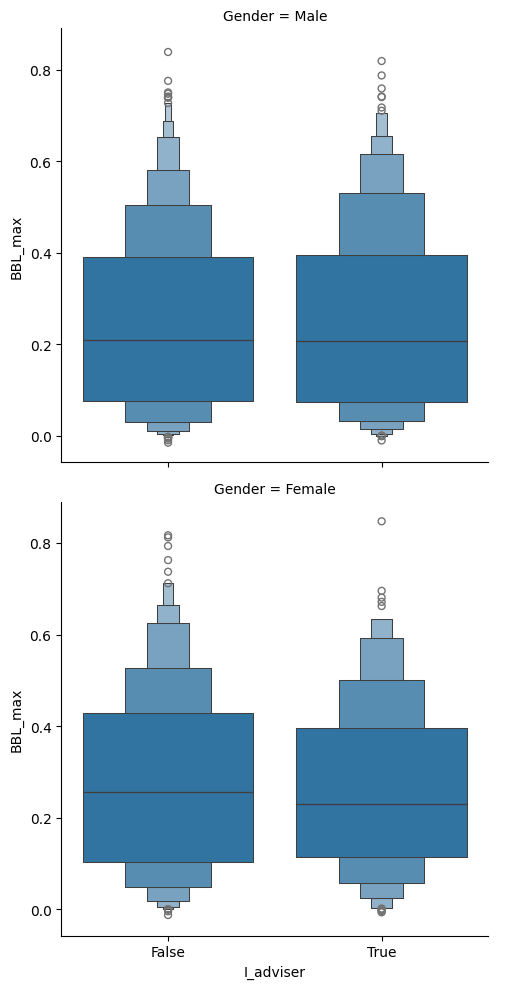

In [ ]:
sns.catplot(data=resL_df, x="I_adviser", y="BBL_max", kind="boxen",row="Gender");#, hue="sex")

## areg function

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

def areg(formula, data=None, absorb=None, cluster=None, logit=False):

  if logit:
    return smf.logit(formula, data).fit(cov_type='HC0')

  y,X = patsy.dmatrices(formula,data,return_type='dataframe')

  if absorb:
    ybar = y.mean()
    y = y -  y.groupby(data[absorb]).transform('mean') + ybar

    Xbar = X.mean()
    X = X - X.groupby(data[absorb]).transform('mean') + Xbar

  reg = sm.OLS(y, X)

  if absorb:
    # Account for df loss from FE transform
    reg.df_resid -= (data[absorb].nunique() - 1)

  if cluster:
    return reg.fit(cov_type='cluster',
                   cov_kwds={'groups':data[cluster].values})
  else:
    return reg.fit(cov_type='HC0')

In [ ]:
from statsmodels.formula.api import ols
anova = ols('BBL_max ~ C(ID)', data=resL_df).fit(cov_type='HC0')
table = sm.stats.anova_lm(anova, test='F', typ=1, robust='HC0')
print(table)
p = table.loc["Residual", "sum_sq"] / table.sum_sq.sum()
print(f"Residual Fraction= {p:.1%}")

              df     sum_sq   mean_sq         F  PR(>F)
C(ID)      602.0  26.583263  0.044158  1.230076  0.0013
Residual  1295.0  46.488933  0.035899       NaN     NaN
Residual Fraction= 63.6%


In [ ]:
print(areg('BBL_max ~ lwc', data=resL_df, absorb='ID').summary())

                            OLS Regression Results                            
Dep. Variable:                BBL_max   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.446
Method:                 Least Squares   F-statistic:                     24.45
Date:                Wed, 15 May 2024   Prob (F-statistic):           8.62e-07
Time:                        15:19:27   Log-Likelihood:                 840.13
No. Observations:                1898   AIC:                            -1676.
Df Residuals:                    1294   BIC:                            -1665.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5703      0.064      8.941      0.0

In [ ]:
resL_df.groupby(['I_adviser','BBL_count'])[['BBL', 'BBL_mean', 'BBL_max']].mean()

BBL  BBL_mean   BBL_max
I_adviser BBL_count                              
False     1.0        0.260585  0.260795  0.260795
          2.0        0.052477  0.139767  0.227572
          3.0        0.017869  0.112429  0.265055
          4.0        0.010741  0.113899  0.321008
          5.0        0.000151  0.077683  0.244877
          6.0        0.001727  0.083695  0.307548
          7.0        0.000250  0.093441  0.356345
True      1.0        0.238640  0.239173  0.239173
          2.0        0.058568  0.139597  0.229583
          3.0        0.020358  0.126417  0.298616
          4.0        0.009212  0.102504  0.288824
          5.0        0.004643  0.074336  0.249787
          6.0        0.001414  0.078715  0.280853
          7.0        0.000775  0.093771  0.350582

In [ ]:
resL_df[['HGI', 'senticnet', 'LM', 'vader', 'BBL', 'BBL_mean', 'BBL_max']].corr()

,HGI,senticnet,LM,vader,BBL,BBL_mean,BBL_max
HGI,1.000000,0.485433,0.530967,0.670296,0.143348,0.146033,0.116641
senticnet,0.485433,1.000000,0.430197,0.407663,0.278617,0.263151,0.164274
LM,0.530967,0.430197,1.000000,0.434028,0.232467,0.221107,0.144782
vader,0.670296,0.407663,0.434028,1.000000,0.139529,0.169923,0.153640
BBL,0.143348,0.278617,0.232467,0.139529,1.000000,0.881917,0.553970
BBL_mean,0.146033,0.263151,0.221107,0.169923,0.881917,1.000000,0.834617
BBL_max,0.116641,0.164274,0.144782,0.153640,0.553970,0.834617,1.000000


In [ ]:
resL_df.wc.describe()

count    1898.000000
mean        0.998081
std         0.544490
min         0.096000
25%         0.616250
50%         0.892000
75%         1.256750
max         4.888000
Name: wc, dtype: float64

In [ ]:
resL_df['lwc'] = np.log(resL_df['word_count'])
resL_df['lwc'].describe()

count    1898.000000
mean        6.763011
std         0.548895
min         4.564348
25%         6.423652
50%         6.793466
75%         7.136284
max         8.494539
Name: lwc, dtype: float64

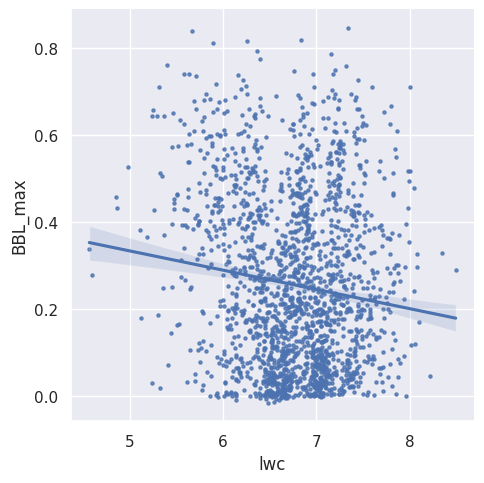

In [ ]:
sns.set_theme(color_codes=True)
sns.lmplot(x="lwc", y="BBL_max", data=resL_df, scatter_kws={"s": 5});

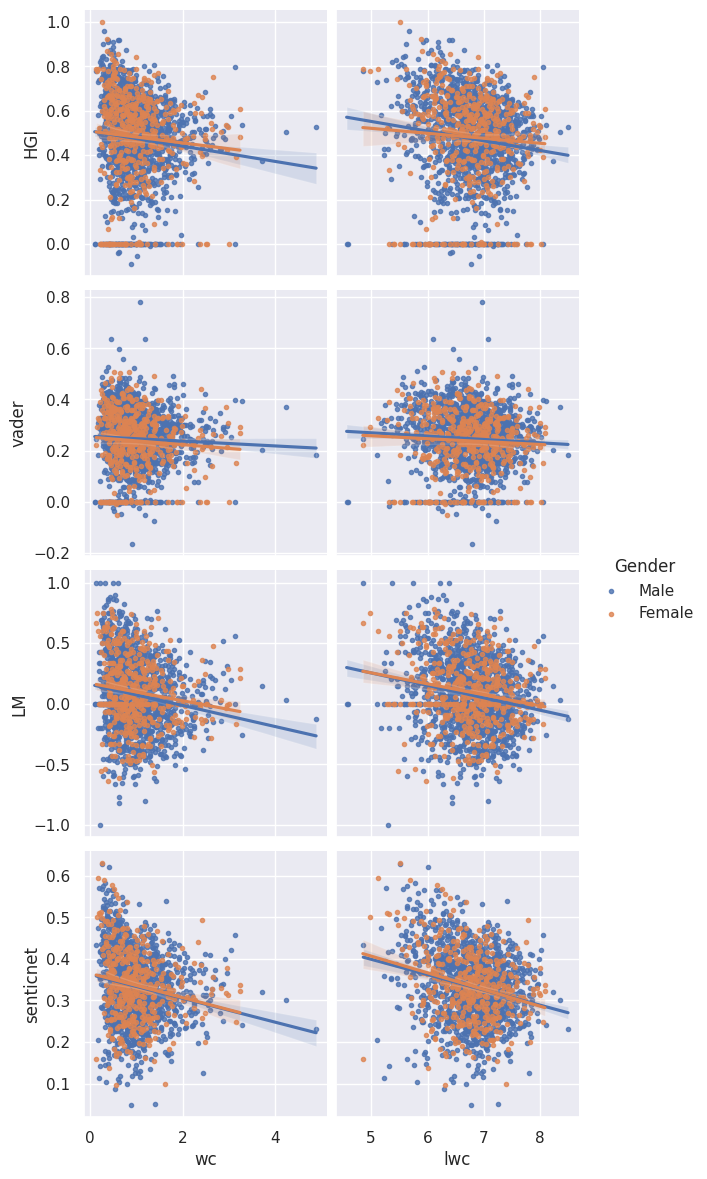

In [ ]:
sns.pairplot(data=resL_df, x_vars=["wc","lwc"], y_vars=["HGI","vader","LM","senticnet"], hue="Gender",
             height=3, aspect=1, kind="reg", markers='.');

In [ ]:
def category_plot(col, depvar="BBL_max", data=resL_df, order=None, path=None):
  nobs = data[col].value_counts()
  medians = data.groupby(col)[depvar].median()
  means = data.groupby(col)[depvar].mean()
  if not order:
    order = list(nobs.index.sort_values())
  box = sns.boxenplot(data=data, x=col, y=depvar, order=order);
  for i, c in enumerate(order):
    box.text(i, medians[c]-0.07, "n="+str(nobs[c]),
              horizontalalignment='center',
              fontdict={'fontsize':10})
    box.text(i, means[c], "x",
              horizontalalignment='center',
              fontdict={'fontsize':7, 'color':'red'})
  if path:
    path = join(table_path, path)
    plt.savefig(path)
  plt.show()

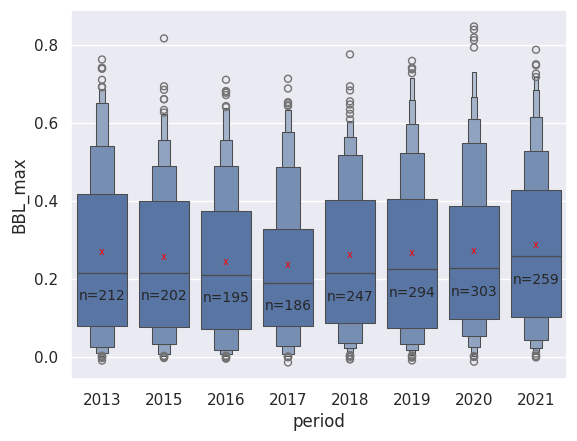

In [ ]:
category_plot("period", order=None)

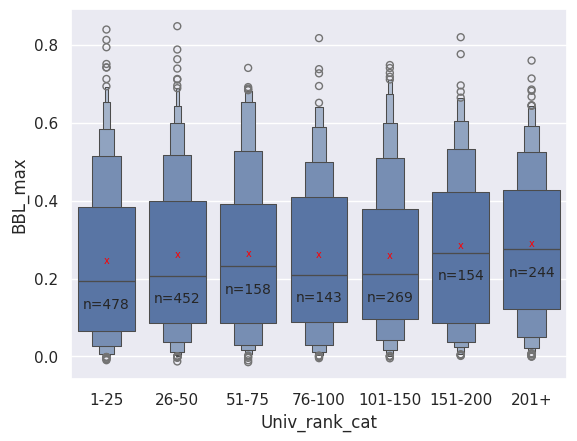

In [ ]:
category_plot("Univ_rank_cat", order=["1-25","26-50","51-75","76-100","101-150","151-200","201+"])

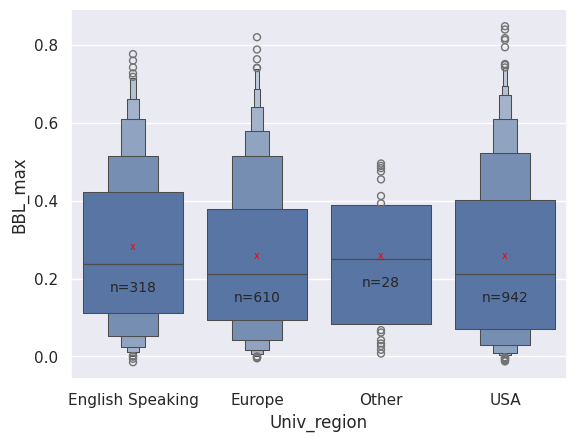

In [ ]:
category_plot("Univ_region")

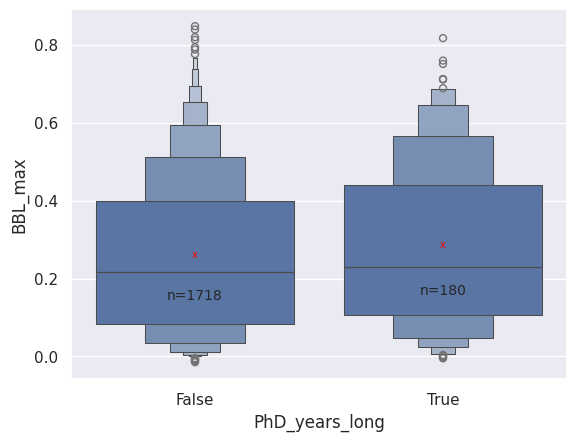

In [ ]:
category_plot('PhD_years_long')

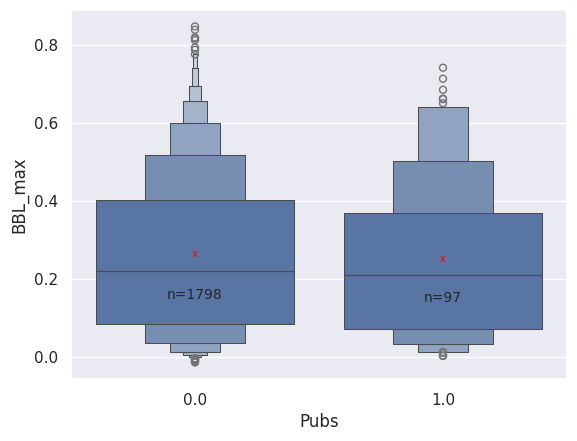

In [ ]:
category_plot('Pubs')

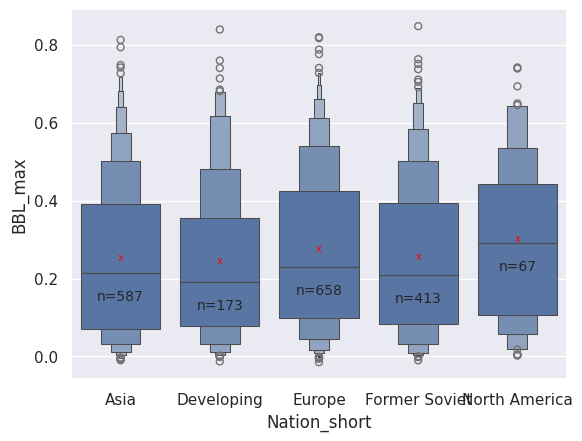

In [ ]:
category_plot("Nation_short")

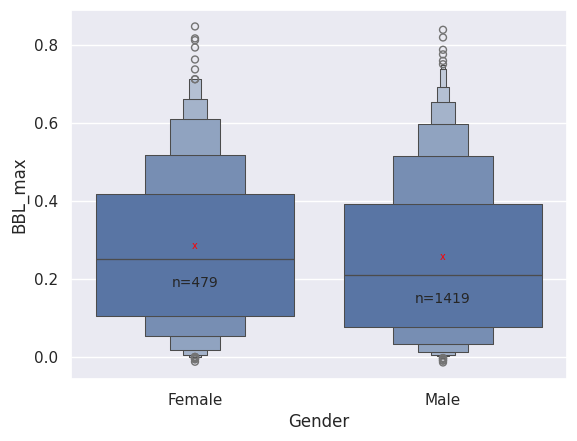

In [ ]:
category_plot("Gender")

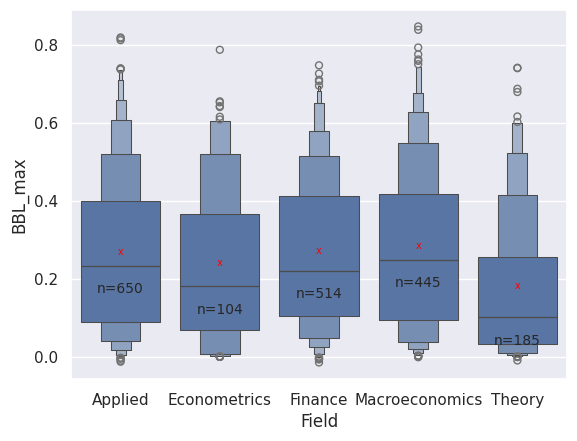

In [ ]:
category_plot("Field")

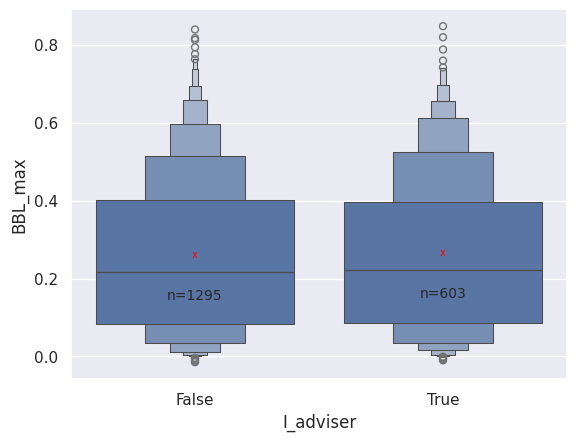

In [ ]:
category_plot("I_adviser")

- Relationship with:
  - sex
  - ranking of phd
  - field of research
  - region of the uni
  - sex of the reviewer... need coding

In [ ]:
print(areg('BBL_max ~  C(Gender)+ C(I_adviser) + wc + C(Field) + C(Nation_short)+ C(Univ_rank_cat)', data=resL_df, absorb=None).summary())

                            OLS Regression Results                            
Dep. Variable:                BBL_max   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.716
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           6.21e-10
Time:                        16:40:49   Log-Likelihood:                 434.00
No. Observations:                1898   AIC:                            -832.0
Df Residuals:                    1880   BIC:                            -732.1
Df Model:                          17                                         
Covariance Type:                  HC0                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# Predict JM Outcomes

- 1. Probability to get a reasearch job
- 2. "Ranking" of the job
- 3. Multiclass classif? Research - Teaching - ORG - Business

In [ ]:
# I will relax the definition of I_research a bit (rank 1000 threshold instead of 500)
# But I will exclude "Policy" jobs?

out1 = res_df["Job_sector"]
out2 = res_df["Job title"]
out3 = res_df["Job type"]

res_df["I_research2"] = 0
res_df.loc[((out1=="Academia") & (out3=="Research") & (out2!="Post-Doc") & (res_df["Job_Trank"]<=1000)), "I_research2"] = 1
res_df.loc[((out1=="Policy") & (res_df["Job_Prank"]<=100)), "I_research2"] = 1
res_df.loc[((out1=="Policy") & (res_df["Job_Rrank"]<=200)), "I_research2"] = 1

In [ ]:
pd.crosstab(res_df["I_research"],res_df["I_research2"])

I_research2,0,1
I_research,,
0,289,38
1,0,276


In [ ]:
res_df['BBL_letter_avg'] = res_df[['RL1_BBL_polaritymax',
                            'RL2_BBL_polaritymax',
                            'RL3_BBL_polaritymax',
                            'RL4_BBL_polaritymax']].mean(axis='columns')
res_df['wc_letter_avg'] = res_df[['wc1','wc2','wc3','wc4']].mean(axis='columns')
res_df['lwc_avg'] = np.log(res_df['wc_letter_avg'])
res_df['wc_letter_avg'].describe()

count    603.000000
mean       1.001115
std        0.378651
min        0.248333
25%        0.738250
50%        0.957333
75%        1.206333
max        2.900333
Name: wc_letter_avg, dtype: float64

In [ ]:
for stat in ['knowledge','JMP','RESEARCH','TEACHING','collaborative','creative','intelligent','hard-working']:
  res_df[f'{stat.lower().replace("-", "")}_letter_avg'] = res_df[[f'RL1_{stat}_max',f'RL2_{stat}_max',
                                         f'RL3_{stat}_max',f'RL4_{stat}_max']].mean(axis='columns')

In [ ]:
res_df['BBL_nonadviser'] = res_df[['RL2_BBL_polaritymax',
                            'RL3_BBL_polaritymax',
                            'RL4_BBL_polaritymax']].mean(axis='columns')
res_df['wc_nonadviser'] = res_df[['wc2','wc3','wc4']].mean(axis='columns')
res_df[['RL1_BBL_polaritymax','BBL_nonadviser']].describe()

,RL1_BBL_polaritymax,BBL_nonadviser
count,603.000000,603.000000
mean,0.258827,0.251523
std,0.198241,0.142131
min,-0.009861,-0.002412
25%,0.086793,0.143956
50%,0.222419,0.245712
75%,0.395993,0.343066
max,0.847392,0.721623


In [ ]:
res_df['senticnet_letter_avg'] = res_df[['RL1_senticnet_polarity','RL2_senticnet_polarity','RL3_senticnet_polarity','RL4_senticnet_polarity']].mean(axis='columns')
res_df['lm_letter_avg'] = res_df[['RL1_LM_polarity','RL2_LM_polarity','RL3_LM_polarity','RL4_LM_polarity']].mean(axis='columns')
res_df['hgi_letter_avg'] = res_df[['RL1_HGI_polarity','RL2_HGI_polarity','RL3_HGI_polarity','RL4_HGI_polarity']].mean(axis='columns')
res_df['vader_letter_avg'] = res_df[['RL1_vader_polarity','RL2_vader_polarity','RL3_vader_polarity','RL4_vader_polarity']].mean(axis='columns')
res_df[['senticnet_letter_avg','lm_letter_avg','hgi_letter_avg','vader_letter_avg']].describe()

,senticnet_letter_avg,lm_letter_avg,hgi_letter_avg,vader_letter_avg
count,597.000000,603.000000,603.000000,603.000000
mean,0.334504,0.077685,0.477828,0.244930
std,0.066030,0.219904,0.142438,0.079202
min,0.105711,-0.609119,0.000000,-0.014327
25%,0.294180,-0.063961,0.391511,0.201134
50%,0.336260,0.083524,0.488489,0.251308
75%,0.375827,0.234419,0.571269,0.295349
max,0.597587,0.863636,0.812879,0.459489


In [ ]:
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+BBL_letter_avg''',
           data=res_df, absorb=None).summary())

                            OLS Regression Results                            
Dep. Variable:            I_research2   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.646
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.42e-24
Time:                        17:25:16   Log-Likelihood:                -375.64
No. Observations:                 603   AIC:                             807.3
Df Residuals:                     575   BIC:                             930.5
Df Model:                          27                                         
Covariance Type:                  HC0                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+BBL_letter_avg''',
           data=res_df, logit=True).get_margeff(at='overall',
                                                 method='dydx',
                                                 atexog=None,
                                                 dummy=True).summary())


Optimization terminated successfully.
         Current function value: 0.591314
         Iterations 5
        Logit Marginal Effects       
Dep. Variable:            I_research2
Method:                          dydx
At:                           overall
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(Gender)[T.Male]                   -0.0653      0.044     -1.479      0.139      -0.152       0.021
C(Field)[T.Econometrics]             0.2091      0.066      3.154      0.002       0.079       0.339
C(Field)[T.Finance]                  0.3171      0.042      7.638      0.000       0.236       0.398
C(Field)[T.Macroeconomics]           0.1320      0.049      2.688      0.007       0.036       0.228
C(Field)[T.Theory]                   0.0576      0.068      0.851      0.395      -0.075       0.190
C(Nation_short)[T.Developing]       -0.

In [ ]:
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +np.log(wc1)+np.log(wc_nonadviser)
              +RL1_BBL_polaritymax
              +BBL_nonadviser''',
           data=res_df, absorb=None).summary())

                            OLS Regression Results                            
Dep. Variable:            I_research2   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     7.231
Date:                Sun, 19 May 2024   Prob (F-statistic):           3.07e-24
Time:                        17:43:22   Log-Likelihood:                -375.87
No. Observations:                 603   AIC:                             811.7
Df Residuals:                     573   BIC:                             943.8
Df Model:                          29                                         
Covariance Type:                  HC0                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +np.log(wc1)+BBL_letter_avg
              +knowledge_letter_avg
              +jmp_letter_avg
              +research_letter_avg
              +teaching_letter_avg
              +intelligent_letter_avg
              +creative_letter_avg
              +hardworking_letter_avg
              +collaborative_letter_avg
              ''',
           data=res_df, absorb=None).summary())

                            OLS Regression Results                            
Dep. Variable:            I_research2   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     6.197
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.42e-23
Time:                        17:43:25   Log-Likelihood:                -372.77
No. Observations:                 603   AIC:                             817.5
Df Residuals:                     567   BIC:                             976.0
Df Model:                          35                                         
Covariance Type:                  HC0                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)

In [ ]:
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+senticnet_letter_avg''',
           data=res_df, absorb=None).summary())
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+lm_letter_avg''',
           data=res_df, absorb=None).summary())
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+hgi_letter_avg''',
           data=res_df, absorb=None).summary())
print(areg('''I_research2~C(Gender)+C(Field)+C(Nation_short)+C(Univ_region)
              +C(Univ_rank_cat)+C(period)
              +lwc_avg+vader_letter_avg''',
           data=res_df, absorb=None).summary())

                            OLS Regression Results                            
Dep. Variable:            I_research2   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     6.227
Date:                Wed, 15 May 2024   Prob (F-statistic):           4.26e-19
Time:                        16:07:07   Log-Likelihood:                -377.26
No. Observations:                 597   AIC:                             810.5
Df Residuals:                     569   BIC:                             933.5
Df Model:                          27                                         
Covariance Type:                  HC0                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# Predict observable characteristics of candidates

## Gender

In [ ]:
cand = RefLetters(20002)

In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=f"The job market candidate is a young {tokenizer_bb.mask_token} .",
          text=cand.letters[1]['text'],
          top_k=30, verbose=False)

{'paper': 0.11298713833093643,
 'economist': 0.09451869875192642,
 'scholar': 0.07210992276668549,
 'researcher': 0.05053285136818886,
 'one': 0.04944683238863945,
 'thinker': 0.0347403921186924,
 'man': 0.029265228658914566,
 'author': 0.018923383206129074,
 'writer': 0.01615692488849163,
 'scientist': 0.01582574099302292,
 'fellow': 0.015738848596811295,
 'leader': 0.01416782382875681,
 'person': 0.014017004519701004,
 'student': 0.012916100211441517,
 'colleague': 0.012102154083549976,
 'candidate': 0.011746326461434364,
 'guy': 0.011241002939641476,
 'article': 0.010072090663015842,
 'reader': 0.009459962137043476,
 'model': 0.007626460399478674,
 'idea': 0.007566884160041809,
 'professor': 0.007167984265834093,
 'philosopher': 0.005734757054597139,
 'study': 0.005393034778535366,
 'professional': 0.005198394414037466,
 'theorist': 0.005053333472460508,
 'theory': 0.004938551690429449,
 'work': 0.004872902296483517,
 'pioneer': 0.00429174629971385,
 'believer': 0.004158685449510813

In [ ]:
VERBALIZER_GENDER = {
    "male": set(['man', 'male']),
    "female": set(["woman", "female"])
}
PROMPT_GENDER = f"The job market candidate is a young {tokenizer_bb.mask_token}."

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_GENDER,
              prompt=PROMPT_GENDER,
              stat_name="prob_male_",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['male']-score['female']
      d[k][stat_name + 'count'] = score.count()
      d[k][stat_name + 'mean'] = score.mean()
      d[k][stat_name + 'max'] = score.max()
      d[k][stat_name + 'all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'count',
                                                   stat_name+'mean',
                                                   stat_name+'max',
                                                   stat_name+'all')))
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)

1                                                       \
      prob_male_count prob_male_mean prob_male_max           prob_male_all   
20002               1       0.024333      0.024333  [0.024333170906174928]   

                    2                               \
      prob_male_count prob_male_mean prob_male_max   
20002               3       0.044409      0.061698   

                                                                       3  \
                                           prob_male_all prob_male_count   
20002  [0.030700078583322465, 0.06169793242588639, 0....               2   

                                    \
      prob_male_mean prob_male_max   
20002       0.033501      0.041354   

                                                     
                                      prob_male_all  
20002  [0.025648554728832096, 0.041354392014909536]

In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 
10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 
10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 
11005, 11006, 11007, 11008, 11010, 11011, 12001, 12002, 13001, 13002, 
13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 
13016, 13017, 13018, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 
13027, 13028, 13029, 13030, 13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 
15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 
15016, 15017, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 
15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 
15037, 15038, 15039, 15040, 15042, 15043, 15044, 15045, 15046, 15047, 
15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 
15058, 15059, 15060, 15061, 15062, 15063, 15064, 16001, 16002, 16003, 
16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013,

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   603 non-null    int64 
 1   RL1_prob_male_count  603 non-null    object
 2   RL1_prob_male_mean   603 non-null    object
 3   RL1_prob_male_max    603 non-null    object
 4   RL1_prob_male_all    603 non-null    object
 5   RL2_prob_male_count  603 non-null    object
 6   RL2_prob_male_mean   603 non-null    object
 7   RL2_prob_male_max    603 non-null    object
 8   RL2_prob_male_all    603 non-null    object
 9   RL3_prob_male_count  552 non-null    object
 10  RL3_prob_male_mean   552 non-null    object
 11  RL3_prob_male_max    552 non-null    object
 12  RL3_prob_male_all    552 non-null    object
 13  RL4_prob_male_count  140 non-null    object
 14  RL4_prob_male_mean   140 non-null    object
 15  RL4_prob_male_max    140 non-null    object
 16  RL4_prob

In [ ]:
stats_p = stats_df[['ID',
                    'RL1_prob_male_all', 'RL2_prob_male_all', 'RL3_prob_male_all', 'RL4_prob_male_all',
                    'RL1_prob_male_count', 'RL2_prob_male_count', 'RL3_prob_male_count', 'RL4_prob_male_count']].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_prob_male_all':f'prob_male{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_prob_male_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=['prob_male', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p['prob_male'] = stats_p.prob_male.apply(ast.literal_eval)
stats_w = stats_p.prob_male.apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns="prob_male", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.042059,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.034804,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.325799,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.105441,0.242539,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.032262,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.030459,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.169299,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.019637,0.047947,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.026384,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.047007,0.143218,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, "candidates_prob_male_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.006,NaN,NaN,NaN,NaN,NaN,NaN
2,0.011,0.009,NaN,NaN,NaN,NaN,NaN
3,0.018,0.013,0.009,NaN,NaN,NaN,NaN
4,0.019,0.014,0.014,0.020,NaN,NaN,NaN
5,0.004,0.017,0.003,-0.004,0.022,NaN,NaN
6,-0.006,0.015,0.004,0.008,0.011,-0.003,NaN
7,0.013,0.026,0.007,0.018,0.009,0.008,0.01


In [ ]:
stats_df.drop(['RL1_prob_male_all', 'RL2_prob_male_all', 'RL3_prob_male_all', 'RL4_prob_male_all'],
              axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   603 non-null    int64  
 1   RL1_prob_male_count  603 non-null    int64  
 2   RL1_prob_male_mean   603 non-null    float64
 3   RL1_prob_male_max    603 non-null    float64
 4   RL2_prob_male_count  603 non-null    int64  
 5   RL2_prob_male_mean   603 non-null    float64
 6   RL2_prob_male_max    603 non-null    float64
 7   RL3_prob_male_count  552 non-null    float64
 8   RL3_prob_male_mean   552 non-null    float64
 9   RL3_prob_male_max    552 non-null    float64
 10  RL4_prob_male_count  140 non-null    float64
 11  RL4_prob_male_mean   140 non-null    float64
 12  RL4_prob_male_max    140 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 61.4 KB


In [ ]:
perf_df = pd.merge(res_df[['ID','Gender']],
                   stats_df[['ID','RL1_prob_male_mean', 'RL2_prob_male_mean',
                             'RL3_prob_male_mean', 'RL4_prob_male_mean']], on="ID", how="left")

for l in range(1,5):
  perf_df.rename(columns={f'RL{l}_prob_male_mean':f'prob_male{l}'}, inplace=True)

perfL_df = pd.wide_to_long(perf_df, stubnames=['prob_male'], i='ID', j='REF').reset_index()

In [ ]:
perfL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2412 non-null   int64  
 1   REF        2412 non-null   int64  
 2   Gender     2412 non-null   object 
 3   prob_male  1898 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 75.5+ KB


In [ ]:
perfL_df.dropna(inplace=True)
perfL_df.GenderP = np.where(perfL_df.prob_male>=0, "Male", "Female")
perfL_df["GenderP"] = pd.Categorical(perfL_df.GenderP)
pd.crosstab(perfL_df.GenderP,perfL_df.Gender)

Gender,Female,Male
row_0,,
Female,471,26
Male,8,1393


In [ ]:
# Save results
perfL_df.to_excel(join(RL_path, "Gender_classif_results.xlsx"), sheet_name='predicted', index=False)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(perfL_df.Gender, perfL_df.GenderP))


              precision    recall  f1-score   support

      Female       0.95      0.98      0.97       479
        Male       0.99      0.98      0.99      1419

    accuracy                           0.98      1898
   macro avg       0.97      0.98      0.98      1898
weighted avg       0.98      0.98      0.98      1898




## Writer is Adviser

In [ ]:
cand = RefLetters(20006)

In [ ]:
PROMPT_ADVISER = f"I write this letter in my role as this job market candidate's {tokenizer_bb.mask_token}."
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_ADVISER,
          text=cand.letters[3]['text'][:2500],
          top_k=50, verbose=False)

{'spokesperson': 0.3516765832901001,
 'representative': 0.0934227854013443,
 'voice': 0.0756601095199585,
 'spokesman': 0.0509113185107708,
 'watchdog': 0.04261624440550804,
 'ambassador': 0.027717990800738335,
 'advocate': 0.022737747058272362,
 'champion': 0.02228022925555706,
 'messenger': 0.0196001548320055,
 'leader': 0.011840165592730045,
 'face': 0.010524395853281021,
 'guardian': 0.009196742437779903,
 'spokeswoman': 0.0074244956485927105,
 'protector': 0.007225168868899345,
 'savior': 0.006451011169701815,
 'president': 0.005749243777245283,
 'manager': 0.004863318055868149,
 'editor': 0.004859353881329298,
 'regulator': 0.004384174011647701,
 'expert': 0.004286870360374451,
 'boss': 0.004215784836560488,
 'narrator': 0.004202608019113541,
 'mouth': 0.003785042790696025,
 'mayor': 0.0036936989054083824,
 'conscience': 0.0036446128506213427,
 'therapist': 0.002971349051222205,
 'reporter': 0.0029556439258158207,
 'captain': 0.0029531801119446754,
 'supervisor': 0.00264229113236

In [ ]:
VERBALIZER_ADVISER = {
    "adviser": set(['adviser', 'advisor','supervisor','chair']),
    "other": set(["professor", "reviewer", "colleague"])
}
PROMPT_ADVISER = f"I write this letter in my role as this job market candidate's {tokenizer_bb.mask_token}."

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_ADVISER,
              prompt=PROMPT_ADVISER,
              stat_name="prob_adv_",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['adviser']-score['other']
      d[k][stat_name + 'count'] = score.count()
      d[k][stat_name + 'mean'] = score.mean()
      d[k][stat_name + 'max'] = score.max()
      d[k][stat_name + 'all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'count',
                                                   stat_name+'mean',
                                                   stat_name+'max',
                                                   stat_name+'all')))
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)

1                             \
      prob_adv_count prob_adv_mean prob_adv_max   
20006              3      0.238796      0.68374   

                                                                      2  \
                                            prob_adv_all prob_adv_count   
20006  [0.0373281205247622, -0.004680424055550247, 0....              3   

                                                                  
      prob_adv_mean prob_adv_max                    prob_adv_all  
20006       0.17216      0.51648  [0.0, 0.0, 0.5164804803207517]

In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 
10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 
10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 
11005, 11006, 11007, 11008, 11010, 11011, 12001, 12002, 13001, 13002, 
13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 
13016, 13017, 13018, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 
13027, 13028, 13029, 13030, 13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 
15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 
15016, 15017, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 
15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 
15037, 15038, 15039, 15040, 15042, 15043, 15044, 15045, 15046, 15047, 
15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 
15058, 15059, 15060, 15061, 15062, 15063, 15064, 16001, 16002, 16003, 
16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013,

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  603 non-null    int64 
 1   RL1_prob_adv_count  603 non-null    object
 2   RL1_prob_adv_mean   603 non-null    object
 3   RL1_prob_adv_max    603 non-null    object
 4   RL1_prob_adv_all    603 non-null    object
 5   RL2_prob_adv_count  603 non-null    object
 6   RL2_prob_adv_mean   603 non-null    object
 7   RL2_prob_adv_max    603 non-null    object
 8   RL2_prob_adv_all    603 non-null    object
 9   RL3_prob_adv_count  552 non-null    object
 10  RL3_prob_adv_mean   552 non-null    object
 11  RL3_prob_adv_max    552 non-null    object
 12  RL3_prob_adv_all    552 non-null    object
 13  RL4_prob_adv_count  140 non-null    object
 14  RL4_prob_adv_mean   140 non-null    object
 15  RL4_prob_adv_max    140 non-null    object
 16  RL4_prob_adv_all    140 no

In [ ]:
stats_p = stats_df[['ID',
                    'RL1_prob_adv_all', 'RL2_prob_adv_all', 'RL3_prob_adv_all', 'RL4_prob_adv_all',
                    'RL1_prob_adv_count', 'RL2_prob_adv_count', 'RL3_prob_adv_count', 'RL4_prob_adv_count']].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_prob_adv_all':f'prob_adv{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_prob_adv_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=['prob_adv', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p['prob_adv'] = stats_p.prob_adv.apply(ast.literal_eval)
stats_w = stats_p.prob_adv.apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns="prob_adv", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.606490,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,-0.006094,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.566684,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.000000,0.231585,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,-0.001327,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.803795,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.551202,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.000000,0.034071,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.670062,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,-0.000196,0.378421,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, "candidates_prob_adv_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.413,NaN,NaN,NaN,NaN,NaN,NaN
2,0.090,0.286,NaN,NaN,NaN,NaN,NaN
3,0.117,0.052,0.317,NaN,NaN,NaN,NaN
4,0.118,0.049,0.076,0.353,NaN,NaN,NaN
5,0.157,0.047,0.073,0.089,0.371,NaN,NaN
6,0.220,0.045,0.037,0.020,0.049,0.323,NaN
7,0.259,0.060,0.027,0.077,0.011,0.138,0.246


In [ ]:
stats_df.drop(['RL1_prob_adv_all', 'RL2_prob_adv_all', 'RL3_prob_adv_all', 'RL4_prob_adv_all'],
              axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  603 non-null    int64  
 1   RL1_prob_adv_count  603 non-null    int64  
 2   RL1_prob_adv_mean   603 non-null    float64
 3   RL1_prob_adv_max    603 non-null    float64
 4   RL2_prob_adv_count  603 non-null    int64  
 5   RL2_prob_adv_mean   603 non-null    float64
 6   RL2_prob_adv_max    603 non-null    float64
 7   RL3_prob_adv_count  552 non-null    float64
 8   RL3_prob_adv_mean   552 non-null    float64
 9   RL3_prob_adv_max    552 non-null    float64
 10  RL4_prob_adv_count  140 non-null    float64
 11  RL4_prob_adv_mean   140 non-null    float64
 12  RL4_prob_adv_max    140 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 61.4 KB


In [ ]:
perf_df = stats_df[['ID','RL1_prob_adv_mean','RL2_prob_adv_mean','RL3_prob_adv_mean','RL4_prob_adv_mean',
                    'RL1_prob_adv_max','RL2_prob_adv_max','RL3_prob_adv_max', 'RL4_prob_adv_max']].copy()

for l in range(1,5):
  perf_df.rename(columns={f'RL{l}_prob_adv_mean':f'prob_adv_mean{l}'}, inplace=True)
  perf_df.rename(columns={f'RL{l}_prob_adv_max':f'prob_adv_max{l}'}, inplace=True)

perfL_df = pd.wide_to_long(perf_df, stubnames=['prob_adv_mean','prob_adv_max'], i='ID', j='REF').reset_index()
perfL_df['adviser'] = np.where(perfL_df.REF==1, 1, 0)
perfL_df.dropna(inplace=True)

In [ ]:
perfL_df['adviserP_mean'] = np.where(perfL_df.prob_adv_mean>=0.37, 1, 0)
perfL_df['adviserP_max'] = np.where(perfL_df.prob_adv_max>=0.60, 1, 0)

In [ ]:
perfL_df.describe()

,ID,REF,prob_adv_mean,prob_adv_max,adviser,adviserP_mean,adviserP_max
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,17613.421496,2.120653,0.277204,0.387761,0.317703,0.310854,0.310854
std,2793.290949,0.943130,0.276182,0.307528,0.465706,0.462965,0.462965
min,10001.000000,1.000000,-0.089575,-0.089575,0.000000,0.000000,0.000000
25%,16019.250000,1.000000,0.022878,0.039640,0.000000,0.000000,0.000000
50%,18051.000000,2.000000,0.194140,0.399603,0.000000,0.000000,0.000000
75%,20027.750000,3.000000,0.465970,0.654952,1.000000,1.000000,1.000000
max,21093.000000,4.000000,0.980676,0.980676,1.000000,1.000000,1.000000


In [ ]:
pd.crosstab(perfL_df.adviserP_max,perfL_df.adviser)

adviser,0,1
adviserP_max,,
0,906,402
1,389,201


In [ ]:
# Save results
perfL_df.to_excel(join(RL_path, "Adviser_classif_results.xlsx"), sheet_name='predicted', index=False)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(perfL_df.adviser, perfL_df.adviserP_max))


              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1295
           1       0.34      0.33      0.34       603

    accuracy                           0.58      1898
   macro avg       0.52      0.52      0.52      1898
weighted avg       0.58      0.58      0.58      1898



## Research Field

In [ ]:
cand = RefLetters(20001)

In [ ]:
VERBALIZER_FIELD = {
    "applied": set(['labor', 'labour','industrial','public','population',
                    'education','health',
                    'development','experimental','urban','resource',
                    'ecological','environmental','agricultural','transition']),
    "macroeconomics": set(["macro", "monetary", "international","global","growth","fiscal","government"]),
    "finance": set(["finance","financial","business","managerial",'risk','portfolio']),
    "theory": set(["micro","mathematical","theory","theoretical","network","game"]),
    "econometrics": set(["statistical"]),
}
PROMPT_FIELD = f"This job market candidate is an expert in the field of {tokenizer_bb.mask_token} economics."


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_FIELD,
          text=cand.letters[2]['text'],
          top_k=30, verbose=False)

{'empirical': 0.16063714027404785,
 'consumer': 0.09878925234079361,
 'industrial': 0.08566595613956451,
 'behavioral': 0.05957716703414917,
 'theoretical': 0.04005150496959686,
 'labor': 0.03837987408041954,
 'environmental': 0.030591050162911415,
 'experimental': 0.028909461572766304,
 'food': 0.026464857161045074,
 'behavioural': 0.021469861268997192,
 'market': 0.01983712799847126,
 'ecological': 0.01909478008747101,
 'applied': 0.01884537748992443,
 'agricultural': 0.018014704808592796,
 'retail': 0.013860505074262619,
 'structural': 0.013651277869939804,
 'macro': 0.010941611602902412,
 'managerial': 0.009995035827159882,
 'economic': 0.009629664942622185,
 'production': 0.00858407560735941,
 'business': 0.00775269977748394,
 'dairy': 0.006911411881446838,
 'labour': 0.0064613102003932,
 'mathematical': 0.0060600643046200275,
 'marketing': 0.0054776109755039215,
 'urban': 0.005208750255405903,
 'welfare': 0.004584578797221184,
 'public': 0.004567841999232769,
 'consumption': 0.00

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_FIELD,
              prompt=PROMPT_FIELD,
              stat_name="field",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      d[k][stat_name] = score.mean(axis=0).idxmax()
  result = pd.DataFrame(candidate.get_stats(stats=(stat_name,)))
  result.index = (candidate.id,)
  #result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)


,1,2,3,4
20040,applied,applied,applied,None


In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  if row["Field"]=="Econometrics":
    continue
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 
10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 
10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 
11005, 11006, 11007, 11008, 11010, 11011, 12001, 12002, 13001, 13002, 
13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 
13016, 13017, 13018, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 
13027, 13028, 13029, 13030, 13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 
15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 
15016, 15017, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 
15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 
15037, 15038, 15039, 15040, 15042, 15043, 15044, 15045, 15046, 15047, 
15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 
15058, 15059, 15060, 15061, 15062, 15063, 15064, 16001, 16002, 16003, 
16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013,

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: 'FieldP'+str(x))
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       570 non-null    int64 
 1   FieldP1  570 non-null    object
 2   FieldP2  570 non-null    object
 3   FieldP3  521 non-null    object
 4   FieldP4  133 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.4+ KB


In [ ]:
perf_df = pd.merge(res_df[['ID','Field']],
                   stats_df[['ID','FieldP1','FieldP2','FieldP3','FieldP4']], on="ID", how="left")

perfL_df = pd.wide_to_long(perf_df, stubnames=['FieldP'], i='ID', j='REF').reset_index()

In [ ]:
perfL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2412 non-null   int64 
 1   REF     2412 non-null   int64 
 2   Field   2412 non-null   object
 3   FieldP  1794 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


In [ ]:
perfL_df.dropna(inplace=True)
perfL_df.replace({'applied':'Applied','finance':'Finance','macroeconomics':'Macroeconomics',
                  'theory':'Theory','econometrics':'Econometrics'}, inplace=True)
pd.crosstab(perfL_df.FieldP,perfL_df.Field)

Field,Applied,Finance,Macroeconomics,Theory
FieldP,,,,
Applied,573,114,234,141
Finance,15,377,53,4
Macroeconomics,43,10,151,5
Theory,19,13,7,35


In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "Field_classif_results.xlsx"), mode='a') as writer:
  perfL_df.to_excel(writer, sheet_name='predicted2', index=False)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(perfL_df.Field, perfL_df.FieldP, zero_division=False))


                precision    recall  f1-score   support

       Applied       0.54      0.88      0.67       650
       Finance       0.84      0.73      0.78       514
Macroeconomics       0.72      0.34      0.46       445
        Theory       0.47      0.19      0.27       185

      accuracy                           0.63      1794
     macro avg       0.64      0.54      0.55      1794
  weighted avg       0.66      0.63      0.61      1794



# Extracting detailed scores from RLs

  1. How well the referee knows the candidate
  2. The quality/publishability of the JMP
  3. The overall quality of the research
  4. How good the candidate is as a teacher
  5. Personality: creative/original, hard-working/persistent, collaborative/sociable/leader, ...?

## Knowledge

In [ ]:
cand = RefLetters(20040)

In [ ]:
VERBALIZER_KNOW = {
    "deep": set(['deep', 'detailed','thorough','comprenhensive','great',]),
    "limited": set(["limited", "little","basic",]),
}
PROMPT_KNOW = f"I have a {tokenizer_bb.mask_token} knowledge of this job market candidate."


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_KNOW,
          text=cand.letters[2]['text'],
          top_k=30, verbose=False)

{'good': 0.08952901512384415,
 'high': 0.06764794886112213,
 'big': 0.06682058423757553,
 'large': 0.04328068718314171,
 'great': 0.04149135202169418,
 'new': 0.03283195570111275,
 'small': 0.02586776576936245,
 'huge': 0.014600220136344433,
 'successful': 0.0137861967086792,
 'positive': 0.01133426371961832,
 'very': 0.011123607866466045,
 'significant': 0.01091029867529869,
 'strong': 0.010472218506038189,
 'different': 0.00966766756027937,
 'major': 0.009514525532722473,
 'little': 0.008942878805100918,
 'business': 0.007655963767319918,
 'market': 0.007349633611738682,
 'higher': 0.005186829250305891,
 'few': 0.005032768938690424,
 'long': 0.004804919473826885,
 'second': 0.00465060118585825,
 'better': 0.004305662587285042,
 'first': 0.004126226529479027,
 'single': 0.004031094256788492,
 'special': 0.004025640897452831,
 'success': 0.003882181830704212,
 'common': 0.0037492606788873672,
 'low': 0.0037479859311133623,
 'clear': 0.003729606978595257}

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_KNOW,
              prompt=PROMPT_KNOW,
              stat_name="knowledge",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['deep']-score['limited']
      d[k][stat_name+'_mean'] = score.mean()
      d[k][stat_name+'_count'] = score.count()
      d[k][stat_name+'_max'] = score.max()
      d[k][stat_name +'_all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'_mean',
                                                   stat_name+'_count',
                                                   stat_name+'_max',
                                                   stat_name +'_all')))
  #result.index = (candidate.id,)
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)


1                                \
      knowledge_mean knowledge_count knowledge_max   
20040       0.122692               7      0.261511   

                                                                      2  \
                                           knowledge_all knowledge_mean   
20040  [0.24735782970674336, 0.019301329622976482, 0....       0.131098   

                                     \
      knowledge_count knowledge_max   
20040               7       0.42618   

                                                                      3  \
                                           knowledge_all knowledge_mean   
20040  [0.08136841282248497, 0.07469623349606991, -0....       0.123686   

                                     \
      knowledge_count knowledge_max   
20040               2      0.182515   

                                                   
                                    knowledge_all  
20040  [0.18251526821404696, 0.06485736276954412]

In [ ]:
res_df.sort_values("ID", inplace=True)
res_df.head()

,ID,Year,First Name,Last Name,PhD university,PhD department,PhD years,Field,Gender,Citizenship,...,RL3_BBL_polarity,RL4_BBL_polarity,wc1,wc2,wc3,wc4,Univ_rank_cat,period,PhD_years_long,Nation_short
600,10001,2010,Moustafa,Abu EL Fadl,Old Dominion University,Finance,6,Finance,Male,Egypt,...,0.618904,NaN,0.230,0.459,0.334,NaN,201+,2013,False,Developing
372,10002,2010,Victor,Archavski,New York University,Economics,7,Finance,Male,Russia,...,0.139234,0.341934,0.984,0.852,0.461,0.266,1-25,2013,True,Former Soviet
269,10003,2010,Raicho,Bojilov,Columbia University,Economics,6,Applied,Male,USA,...,0.119442,0.004778,1.195,0.334,0.896,0.664,1-25,2013,False,North America
418,10004,2010,Pedro,Bom,Tilburg University,Economics,7,Macroeconomics,Male,Portugal,...,0.101435,0.497358,0.869,0.421,0.339,0.409,26-50,2013,True,Europe
597,10005,2010,Konstantin,Golyaev,University of Minnesota,Economics,5,Applied,Male,Russia,...,NaN,NaN,0.254,0.463,NaN,NaN,1-25,2013,False,Former Soviet


In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if index%10==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 
10002, 10003, 10004, 10005, 10006, 
10007, 10009, 
10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 11005, 
11006, 11007, 11008, 11010, 11011, 
12001, 12002, 13001, 
13002, 13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13020, 13021, 13022, 13023, 13024, 13025, 13026, 13027, 13028, 13029, 13030, 13034, 13035, 13036, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 
15020, 15021, 
15022, 15023, 15024, 15025, 
15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 15037, 15038, 15039, 15040, 
15042, 15043, 
15044, 15045, 15046, 15047, 15048, 15049, 15050, 15051, 15052, 
15053, 15054, 15055, 15056, 
15057, 15058, 15059, 15060, 15061, 15062, 15063, 15064, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 
16008, 16009, 16010, 16011, 16012, 16013,

In [ ]:
stats_lst[-1]

1                                                      \
      knowledge_mean knowledge_count knowledge_max         knowledge_all   
21093       0.232473               1      0.232473  [0.2324731587432325]   

                   2                                                       \
      knowledge_mean knowledge_count knowledge_max          knowledge_all   
21093       0.163447               1      0.163447  [0.16344718961045146]   

                   3                                \
      knowledge_mean knowledge_count knowledge_max   
21093      -0.019056               2       0.02494   

                                                     
                                      knowledge_all  
21093  [-0.06305278860963881, 0.024940019007772207]

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   603 non-null    int64 
 1   RL1_knowledge_mean   603 non-null    object
 2   RL1_knowledge_count  603 non-null    object
 3   RL1_knowledge_max    603 non-null    object
 4   RL1_knowledge_all    603 non-null    object
 5   RL2_knowledge_mean   603 non-null    object
 6   RL2_knowledge_count  603 non-null    object
 7   RL2_knowledge_max    603 non-null    object
 8   RL2_knowledge_all    603 non-null    object
 9   RL3_knowledge_mean   552 non-null    object
 10  RL3_knowledge_count  552 non-null    object
 11  RL3_knowledge_max    552 non-null    object
 12  RL3_knowledge_all    552 non-null    object
 13  RL4_knowledge_mean   140 non-null    object
 14  RL4_knowledge_count  140 non-null    object
 15  RL4_knowledge_max    140 non-null    object
 16  RL4_know

In [ ]:
stat = 'knowledge'
stats_p = stats_df[['ID']+[f'RL{i}_{stat}_all' for i in range(1,5)]+[f'RL{i}_{stat}_count' for i in range(1,5)]].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_{stat}_all':f'{stat}{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_{stat}_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=[f'{stat}', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p[f'{stat}'] = stats_p[f'{stat}'].apply(ast.literal_eval)
stats_w = stats_p[f'{stat}'].apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns=f"{stat}", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.227456,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.095880,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.247792,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,-0.015416,-0.017945,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.184352,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,-0.117229,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.140427,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.145873,-0.028032,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.007375,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.042652,0.182599,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, f"candidates_{stat}_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.079,NaN,NaN,NaN,NaN,NaN,NaN
2,0.044,0.056,NaN,NaN,NaN,NaN,NaN
3,0.049,0.016,0.072,NaN,NaN,NaN,NaN
4,0.061,0.003,0.040,0.078,NaN,NaN,NaN
5,0.076,-0.006,0.005,0.043,0.107,NaN,NaN
6,0.045,-0.010,0.023,0.013,0.028,0.090,NaN
7,0.093,-0.000,0.029,0.023,0.023,0.073,0.141


In [ ]:
stats_df.drop([f'RL{i}_{stat}_all' for i in range(1,5)], axis='columns', inplace=True)
stats_df.drop([f'RL{i}_{stat}_{c}' for i in range(1,5) for c in ['count','mean']], axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 603 non-null    int64  
 1   RL1_knowledge_max  603 non-null    float64
 2   RL2_knowledge_max  603 non-null    float64
 3   RL3_knowledge_max  552 non-null    float64
 4   RL4_knowledge_max  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
stats_df[[f'RL{i}_{stat}_max' for i in range(1,5)]].describe()

,RL1_knowledge_max,RL2_knowledge_max,RL3_knowledge_max,RL4_knowledge_max
count,603.000000,603.000000,552.000000,140.000000
mean,0.111158,0.089498,0.091634,0.101302
std,0.093422,0.108766,0.118371,0.111811
min,-0.281760,-0.425362,-0.473625,-0.378889
25%,0.045732,0.027669,0.025923,0.039907
50%,0.106309,0.087770,0.097140,0.097070
75%,0.172547,0.149588,0.156903,0.176166
max,0.398968,0.640712,0.526810,0.349865


In [ ]:
res2_df = pd.merge(res_df, stats_df, on="ID", how="left")
res2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 96 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      603 non-null    int64   
 1   Year                    603 non-null    int64   
 2   First Name              603 non-null    object  
 3   Last Name               603 non-null    object  
 4   PhD university          603 non-null    object  
 5   PhD department          603 non-null    object  
 6   PhD years               603 non-null    int64   
 7   Field                   603 non-null    object  
 8   Gender                  603 non-null    object  
 9   Citizenship             603 non-null    object  
 10  Undergraduate Country   603 non-null    object  
 11  Personal website        590 non-null    object  
 12  Email                   551 non-null    object  
 13  Pubs                    602 non-null    float64 
 14  Publications bad        60

In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "candidates_results4.xlsx"), mode='a') as writer:
  res2_df.to_excel(writer, sheet_name='knowledge', index=False)


## JM Paper

In [ ]:
cand = RefLetters(20011)

In [ ]:
VERBALIZER_JMP = {
    "positive": set(['great','wonderful','brilliant','marvelous','perfect','remarkable',
                     'fantastic','fascinating','seminal','powerful','pioneering','groundbreaking']),
    "negative": set(["typical","regular","basic","standard"]),
}
PROMPT_JMP = f"In summary, the job market paper is a {tokenizer_bb.mask_token} piece of research."


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_JMP,
          text=cand.letters[2]['text'],
          top_k=30, verbose=False)

{'good': 0.06879220902919769,
 'new': 0.03567161038517952,
 'significant': 0.026555774733424187,
 'successful': 0.021963493898510933,
 'particular': 0.021702932193875313,
 'major': 0.020617982372641563,
 'possible': 0.01611131802201271,
 'great': 0.015473561361432076,
 'novel': 0.014927699230611324,
 'small': 0.01319621130824089,
 'useful': 0.013156120665371418,
 'large': 0.012808065861463547,
 'high': 0.012448898516595364,
 'common': 0.011650565080344677,
 'positive': 0.009850195609033108,
 'unique': 0.009611834771931171,
 'considerable': 0.009125854820013046,
 'key': 0.008942263200879097,
 'different': 0.008618832565844059,
 'relevant': 0.008533413521945477,
 'first': 0.008278333581984043,
 'strong': 0.008219189010560513,
 'special': 0.008132128976285458,
 'single': 0.0079481927677989,
 'valuable': 0.007696812506765127,
 'second': 0.007373861037194729,
 'practical': 0.006792714353650808,
 'promising': 0.006474604364484549,
 'suitable': 0.006430543959140778,
 'logical': 0.006367231719

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_JMP,
              prompt=PROMPT_JMP,
              stat_name="JMP",
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['positive']-score['negative']
      d[k][stat_name+'_mean'] = score.mean()
      d[k][stat_name+'_count'] = score.count()
      d[k][stat_name+'_max'] = score.max()
      d[k][stat_name +'_all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'_mean',
                                                   stat_name+'_count',
                                                   stat_name+'_max',
                                                   stat_name +'_all')))
  #result.index = (candidate.id,)
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)


1                      \
       JMP_mean JMP_count   JMP_max   
20011  0.162977         3  0.298687   

                                                                 2            \
                                                 JMP_all  JMP_mean JMP_count   
20011  [0.10251572262495756, 0.08772750408388674, 0.2...  0.096304         3   

                                                                           3  \
        JMP_max                                            JMP_all  JMP_mean   
20011  0.212554  [0.019081653095781803, 0.05727513896999881, 0....  0.444767   

                                                  
      JMP_count   JMP_max                JMP_all  
20011         1  0.444767  [0.44476661167573184]

In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if (row.ID % 10)==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 
10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11010, 
11011, 12001, 12002, 13001, 13002, 13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13020, 
13021, 13022, 13023, 13024, 13025, 13026, 13027, 13028, 13029, 13030, 
13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 
15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 15020, 
15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 
15031, 15032, 15033, 15034, 15035, 15037, 15038, 15039, 15040, 
15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 
15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 
15061, 15062, 15063, 15064, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 
16011, 16012, 16013, 1

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             603 non-null    int64 
 1   RL1_JMP_mean   603 non-null    object
 2   RL1_JMP_count  603 non-null    object
 3   RL1_JMP_max    603 non-null    object
 4   RL1_JMP_all    603 non-null    object
 5   RL2_JMP_mean   603 non-null    object
 6   RL2_JMP_count  603 non-null    object
 7   RL2_JMP_max    603 non-null    object
 8   RL2_JMP_all    603 non-null    object
 9   RL3_JMP_mean   552 non-null    object
 10  RL3_JMP_count  552 non-null    object
 11  RL3_JMP_max    552 non-null    object
 12  RL3_JMP_all    552 non-null    object
 13  RL4_JMP_mean   140 non-null    object
 14  RL4_JMP_count  140 non-null    object
 15  RL4_JMP_max    140 non-null    object
 16  RL4_JMP_all    140 non-null    object
dtypes: int64(1), object(16)
memory usage: 80.2+ KB


In [ ]:
stat = 'JMP'
stats_p = stats_df[['ID']+[f'RL{i}_{stat}_all' for i in range(1,5)]+[f'RL{i}_{stat}_count' for i in range(1,5)]].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_{stat}_all':f'{stat}{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_{stat}_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=[f'{stat}', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p[f'{stat}'] = stats_p[f'{stat}'].apply(ast.literal_eval)
stats_w = stats_p[f'{stat}'].apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns=f"{stat}", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.272424,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.219974,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.306919,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.066539,0.037809,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.212066,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.226572,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.512706,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.064646,0.238511,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.433564,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.119414,0.458053,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, f"candidates_{stat}_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.178,NaN,NaN,NaN,NaN,NaN,NaN
2,0.097,0.185,NaN,NaN,NaN,NaN,NaN
3,0.098,0.088,0.216,NaN,NaN,NaN,NaN
4,0.097,0.073,0.111,0.216,NaN,NaN,NaN
5,0.111,0.056,0.068,0.082,0.222,NaN,NaN
6,0.084,0.046,0.071,0.050,0.094,0.214,NaN
7,0.124,0.062,0.084,0.096,0.068,0.070,0.264


In [ ]:
stats_df.drop([f'RL{i}_{stat}_all' for i in range(1,5)], axis='columns', inplace=True)
stats_df.drop([f'RL{i}_{stat}_{c}' for i in range(1,5) for c in ['count','mean']], axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           603 non-null    int64  
 1   RL1_JMP_max  603 non-null    float64
 2   RL2_JMP_max  603 non-null    float64
 3   RL3_JMP_max  552 non-null    float64
 4   RL4_JMP_max  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
stats_df[[f'RL{i}_{stat}_max' for i in range(1,5)]].describe()

,RL1_JMP_max,RL2_JMP_max,RL3_JMP_max,RL4_JMP_max
count,603.000000,603.000000,552.000000,140.000000
mean,0.202517,0.191292,0.198836,0.208184
std,0.106991,0.105617,0.107283,0.117165
min,-0.016038,-0.109238,-0.052510,0.002463
25%,0.121457,0.106314,0.113922,0.114738
50%,0.189513,0.176563,0.182404,0.190687
75%,0.271655,0.262524,0.267778,0.282970
max,0.552691,0.540874,0.592296,0.528466


In [ ]:
res2_df = pd.merge(res2_df, stats_df, on="ID", how="left")
res2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 100 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      603 non-null    int64   
 1   Year                    603 non-null    int64   
 2   First Name              603 non-null    object  
 3   Last Name               603 non-null    object  
 4   PhD university          603 non-null    object  
 5   PhD department          603 non-null    object  
 6   PhD years               603 non-null    int64   
 7   Field                   603 non-null    object  
 8   Gender                  603 non-null    object  
 9   Citizenship             603 non-null    object  
 10  Undergraduate Country   603 non-null    object  
 11  Personal website        590 non-null    object  
 12  Email                   551 non-null    object  
 13  Pubs                    602 non-null    float64 
 14  Publications bad        6

In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "candidates_results4.xlsx"), mode='a') as writer:
  res2_df.to_excel(writer, sheet_name=f'{stat}', index=False)


## Research Overall Quality

In [ ]:
cand = RefLetters(20016)

In [ ]:
VERBALIZER_RESEARCH = {
    "positive": set(['certain','sure','positive','convinced','confident']),
    "negative": set(["surprised","unsure","doubtful"]),
}
PROMPT_RESEARCH = f"I am {tokenizer_bb.mask_token} that this candidate is going to be succesful publishing their papers."


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_RESEARCH,
          text=cand.letters[1]['text'],
          top_k=30, verbose=False)

{'sure': 0.4074307978153229,
 'confident': 0.19039471447467804,
 'convinced': 0.11514975875616074,
 'certain': 0.04568540304899216,
 'happy': 0.025275344029068947,
 'satisfied': 0.01765395514667034,
 'optimistic': 0.01656963862478733,
 'pleased': 0.016515130177140236,
 'glad': 0.014005693607032299,
 'hopeful': 0.013670400716364384,
 'positive': 0.012964730150997639,
 'hoping': 0.010293287225067616,
 'thinking': 0.008683338761329651,
 'surprised': 0.008169666863977909,
 'impressed': 0.005913080181926489,
 'told': 0.005543611012399197,
 'proud': 0.005044940859079361,
 'assured': 0.004124198108911514,
 'encouraged': 0.003722400637343526,
 'assuming': 0.0028695163782685995,
 'excited': 0.002777241636067629,
 'delighted': 0.002625961322337389,
 'persuaded': 0.002537189517170191,
 'amazed': 0.0024089235812425613,
 'saying': 0.0023644280154258013,
 'aware': 0.002124055987223983,
 'reassured': 0.0016655633226037025,
 'afraid': 0.0015218210173770785,
 'thrilled': 0.0012357294326648116,
 'comfor

In [ ]:
stat = 'RESEARCH'
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_RESEARCH,
              prompt=PROMPT_RESEARCH,
              stat_name=stat,
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['positive']-score['negative']
      d[k][stat_name+'_mean'] = score.mean()
      d[k][stat_name+'_count'] = score.count()
      d[k][stat_name+'_max'] = score.max()
      d[k][stat_name +'_all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'_mean',
                                                   stat_name+'_count',
                                                   stat_name+'_max',
                                                   stat_name +'_all')))
  #result.index = (candidate.id,)
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)


1                              \
      RESEARCH_mean RESEARCH_count RESEARCH_max   
20016      0.633002              2     0.736298   

                                                           2                 \
                                  RESEARCH_all RESEARCH_mean RESEARCH_count   
20016  [0.529705404303968, 0.7362977657467127]      0.447269              1   

                                                     3                 \
      RESEARCH_max          RESEARCH_all RESEARCH_mean RESEARCH_count   
20016     0.447269  [0.4472686229273677]      0.565009              1   

                                          
      RESEARCH_max          RESEARCH_all  
20016     0.565009  [0.5650092624127865]

In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if (row.ID % 10)==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 
10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11010, 
11011, 12001, 12002, 13001, 13002, 13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13020, 
13021, 13022, 13023, 13024, 13025, 13026, 13027, 13028, 13029, 13030, 
13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 
15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 15020, 
15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 
15031, 15032, 15033, 15034, 15035, 15037, 15038, 15039, 15040, 
15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 
15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 
15061, 15062, 15063, 15064, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 
16011, 16012, 16013, 1

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  603 non-null    int64 
 1   RL1_RESEARCH_mean   603 non-null    object
 2   RL1_RESEARCH_count  603 non-null    object
 3   RL1_RESEARCH_max    603 non-null    object
 4   RL1_RESEARCH_all    603 non-null    object
 5   RL2_RESEARCH_mean   603 non-null    object
 6   RL2_RESEARCH_count  603 non-null    object
 7   RL2_RESEARCH_max    603 non-null    object
 8   RL2_RESEARCH_all    603 non-null    object
 9   RL3_RESEARCH_mean   552 non-null    object
 10  RL3_RESEARCH_count  552 non-null    object
 11  RL3_RESEARCH_max    552 non-null    object
 12  RL3_RESEARCH_all    552 non-null    object
 13  RL4_RESEARCH_mean   140 non-null    object
 14  RL4_RESEARCH_count  140 non-null    object
 15  RL4_RESEARCH_max    140 non-null    object
 16  RL4_RESEARCH_all    140 no

In [ ]:
stats_p = stats_df[['ID']+[f'RL{i}_{stat}_all' for i in range(1,5)]+[f'RL{i}_{stat}_count' for i in range(1,5)]].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_{stat}_all':f'{stat}{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_{stat}_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=[f'{stat}', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p[f'{stat}'] = stats_p[f'{stat}'].apply(ast.literal_eval)
stats_w = stats_p[f'{stat}'].apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns=f"{stat}", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.739294,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.721913,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.884481,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.117296,0.822452,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.455890,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.473192,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.750773,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.841833,0.908303,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.746775,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.759540,0.734186,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, f"candidates_{stat}_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.736,NaN,NaN,NaN,NaN,NaN,NaN
2,0.591,0.726,NaN,NaN,NaN,NaN,NaN
3,0.605,0.550,0.751,NaN,NaN,NaN,NaN
4,0.627,0.497,0.584,0.763,NaN,NaN,NaN
5,0.590,0.509,0.545,0.558,0.750,NaN,NaN
6,0.629,0.477,0.546,0.566,0.564,0.744,NaN
7,0.702,0.472,0.538,0.553,0.664,0.714,0.792


In [ ]:
stats_df.drop([f'RL{i}_{stat}_all' for i in range(1,5)], axis='columns', inplace=True)
stats_df.drop([f'RL{i}_{stat}_{c}' for i in range(1,5) for c in ['count','mean']], axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                603 non-null    int64  
 1   RL1_RESEARCH_max  603 non-null    float64
 2   RL2_RESEARCH_max  603 non-null    float64
 3   RL3_RESEARCH_max  552 non-null    float64
 4   RL4_RESEARCH_max  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
stats_df[[f'RL{i}_{stat}_max' for i in range(1,5)]].describe()

,RL1_RESEARCH_max,RL2_RESEARCH_max,RL3_RESEARCH_max,RL4_RESEARCH_max
count,603.000000,603.000000,552.000000,140.000000
mean,0.769479,0.745413,0.755275,0.762457
std,0.133374,0.152064,0.157388,0.158954
min,0.069727,0.126014,-0.280941,0.008224
25%,0.698325,0.677730,0.689194,0.723267
50%,0.799873,0.781832,0.801194,0.794839
75%,0.865893,0.860782,0.867957,0.878206
max,0.963358,0.945484,0.951149,0.951914


In [ ]:
#res_df = pd.merge(res_df, stats_df, on="ID", how="left")
res_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 104 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    ID                      int64  
 1    Year                    int64  
 2    First Name              object 
 3    Last Name               object 
 4    PhD university          object 
 5    PhD department          object 
 6    PhD years               int64  
 7    Field                   object 
 8    Gender                  object 
 9    Citizenship             object 
 10   Undergraduate Country   object 
 11   Personal website        object 
 12   Email                   object 
 13   Pubs                    float64
 14   Publications bad        float64
 15   Ref1                    object 
 16   Ref2                    object 
 17   Ref3                    object 
 18   Ref4                    object 
 19   Job title               object 
 20   Job type                object 
 21   Job Institutio

In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "candidates_results4.xlsx"), mode='a') as writer:
  res_df.to_excel(writer, sheet_name=f'{stat}', index=False)


## Teaching

In [ ]:
cand = RefLetters(20017)

In [ ]:
VERBALIZER_TEACHING = {
    "positive": set(['great','perfect','wonderful','brilliant','fantastic']),
    "negative": set(["regular","mediocre","bad"]),
}
PROMPT_TEACHING = f"This job market candidate will be a {tokenizer_bb.mask_token} teacher."


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_TEACHING,
          text=cand.letters[2]['text'],
          top_k=30, verbose=False)

{'good': 0.13917972147464752,
 'great': 0.05748187378048897,
 'competent': 0.043792422860860825,
 'productive': 0.04267146438360214,
 'successful': 0.042572081089019775,
 'valuable': 0.030818957835435867,
 'useful': 0.025528937578201294,
 'capable': 0.02296552062034607,
 'dynamic': 0.021001417189836502,
 'talented': 0.01895751617848873,
 'dedicated': 0.01796508952975273,
 'promising': 0.015312696807086468,
 'professional': 0.014847945421934128,
 'brilliant': 0.014587474055588245,
 'skilled': 0.013993334956467152,
 'model': 0.01135413907468319,
 'reliable': 0.011133152060210705,
 'diligent': 0.010746071115136147,
 'gifted': 0.010604580864310265,
 'fantastic': 0.009958642534911633,
 'popular': 0.0099455825984478,
 'qualified': 0.0094700176268816,
 'versatile': 0.006932559423148632,
 'strong': 0.006667133420705795,
 'fine': 0.0064605651423335075,
 'stimulating': 0.006307094823569059,
 'wonderful': 0.005641460418701172,
 'perfect': 0.005532653070986271,
 'responsible': 0.005402762908488512

In [ ]:
stat = 'TEACHING'
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_TEACHING,
              prompt=PROMPT_TEACHING,
              stat_name=stat,
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['positive']-score['negative']
      d[k][stat_name+'_mean'] = score.mean()
      d[k][stat_name+'_count'] = score.count()
      d[k][stat_name+'_max'] = score.max()
      d[k][stat_name +'_all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'_mean',
                                                   stat_name+'_count',
                                                   stat_name+'_max',
                                                   stat_name +'_all')))
  #result.index = (candidate.id,)
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand)


1                              \
      TEACHING_mean TEACHING_count TEACHING_max   
20017      0.523298              4     0.652922   

                                                                     2  \
                                            TEACHING_all TEACHING_mean   
20017  [0.652921678556595, 0.5909466266166419, 0.5084...      0.091294   

                                                                     3  \
      TEACHING_count TEACHING_max           TEACHING_all TEACHING_mean   
20017              1     0.091294  [0.09129380504600704]      0.410368   

                                                                     4  \
      TEACHING_count TEACHING_max           TEACHING_all TEACHING_mean   
20017              1     0.410368  [0.41036786139011383]      0.190828   

                                                          
      TEACHING_count TEACHING_max           TEACHING_all  
20017              1     0.190828  [0.19082824763609096]

In [ ]:
# gather stats
stats_lst = []
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if (row.ID % 10)==0:
    print()
  candidate = RefLetters(row)
  stats = get_LLM_stats(candidate)
  stats_lst.append(stats)
  #pprint(stats)


10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 
10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11010, 
11011, 12001, 12002, 13001, 13002, 13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13020, 
13021, 13022, 13023, 13024, 13025, 13026, 13027, 13028, 13029, 13030, 
13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 
15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 15020, 
15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 
15031, 15032, 15033, 15034, 15035, 15037, 15038, 15039, 15040, 
15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 
15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 
15061, 15062, 15063, 15064, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 
16011, 16012, 16013, 1

In [ ]:
import ast
stats_df = pd.concat(stats_lst, axis=0)
stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'ID'}, inplace=True)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  603 non-null    int64 
 1   RL1_TEACHING_mean   603 non-null    object
 2   RL1_TEACHING_count  603 non-null    object
 3   RL1_TEACHING_max    603 non-null    object
 4   RL1_TEACHING_all    603 non-null    object
 5   RL2_TEACHING_mean   603 non-null    object
 6   RL2_TEACHING_count  603 non-null    object
 7   RL2_TEACHING_max    603 non-null    object
 8   RL2_TEACHING_all    603 non-null    object
 9   RL3_TEACHING_mean   552 non-null    object
 10  RL3_TEACHING_count  552 non-null    object
 11  RL3_TEACHING_max    552 non-null    object
 12  RL3_TEACHING_all    552 non-null    object
 13  RL4_TEACHING_mean   140 non-null    object
 14  RL4_TEACHING_count  140 non-null    object
 15  RL4_TEACHING_max    140 non-null    object
 16  RL4_TEACHING_all    140 no

In [ ]:
stats_p = stats_df[['ID']+[f'RL{i}_{stat}_all' for i in range(1,5)]+[f'RL{i}_{stat}_count' for i in range(1,5)]].copy()
for l in range(1,5):
  stats_p.rename(columns={f'RL{l}_{stat}_all':f'{stat}{l}'}, inplace=True)
  stats_p.rename(columns={f'RL{l}_{stat}_count':f'count{l}'}, inplace=True)

stats_p = pd.wide_to_long(stats_p, stubnames=[f'{stat}', 'count'], i='ID', j='REF').reset_index()
stats_p = stats_p.sort_values(["ID", "REF"])
stats_p.dropna(inplace=True)
stats_p[f'{stat}'] = stats_p[f'{stat}'].apply(ast.literal_eval)
stats_w = stats_p[f'{stat}'].apply(pd.Series)
stats_w.columns = [f'w{i}' for i in range(1,8)]
stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
stats_p.drop(columns=f"{stat}", inplace=True)

In [ ]:
stats_p.head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.360888,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.207789,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.368557,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.091664,0.089756,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.581183,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.384986,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.085589,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,-0.030597,0.043497,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.393435,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.046933,0.455780,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
stats_p.to_excel(join(RL_path, f"candidates_{stat}_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
stats_p.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3)

,w1,w2,w3,w4,w5,w6,w7
count,,,,,,,
1,0.291,NaN,NaN,NaN,NaN,NaN,NaN
2,0.157,0.292,NaN,NaN,NaN,NaN,NaN
3,0.150,0.094,0.337,NaN,NaN,NaN,NaN
4,0.192,0.056,0.136,0.359,NaN,NaN,NaN
5,0.173,0.049,0.038,0.120,0.319,NaN,NaN
6,0.185,0.039,0.051,0.075,0.134,0.306,NaN
7,0.248,0.053,0.050,0.059,0.080,0.192,0.38


In [ ]:
stats_df.drop([f'RL{i}_{stat}_all' for i in range(1,5)], axis='columns', inplace=True)
stats_df.drop([f'RL{i}_{stat}_{c}' for i in range(1,5) for c in ['count','mean']], axis='columns', inplace=True)
stats_df = stats_df.apply(pd.to_numeric)
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                603 non-null    int64  
 1   RL1_TEACHING_max  603 non-null    float64
 2   RL2_TEACHING_max  603 non-null    float64
 3   RL3_TEACHING_max  552 non-null    float64
 4   RL4_TEACHING_max  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
stats_df[[f'RL{i}_{stat}_max' for i in range(1,5)]].describe()

,RL1_TEACHING_max,RL2_TEACHING_max,RL3_TEACHING_max,RL4_TEACHING_max
count,603.000000,603.000000,552.000000,140.000000
mean,0.318239,0.304873,0.327000,0.308693
std,0.154911,0.158071,0.160570,0.172125
min,0.000000,-0.121363,0.000625,-0.014277
25%,0.205270,0.189047,0.197928,0.175552
50%,0.312006,0.290519,0.317681,0.299628
75%,0.432707,0.404571,0.445892,0.425579
max,0.837800,0.813053,0.783816,0.814721


In [ ]:
res_df = pd.merge(res_df, stats_df, on="ID", how="left")
res_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 108 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    ID                      int64  
 1    Year                    int64  
 2    First Name              object 
 3    Last Name               object 
 4    PhD university          object 
 5    PhD department          object 
 6    PhD years               int64  
 7    Field                   object 
 8    Gender                  object 
 9    Citizenship             object 
 10   Undergraduate Country   object 
 11   Personal website        object 
 12   Email                   object 
 13   Pubs                    float64
 14   Publications bad        float64
 15   Ref1                    object 
 16   Ref2                    object 
 17   Ref3                    object 
 18   Ref4                    object 
 19   Job title               object 
 20   Job type                object 
 21   Job Institutio

In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "candidates_results4.xlsx"), mode='a') as writer:
  res_df.to_excel(writer, sheet_name=f'{stat}', index=False)


## Personality

In [ ]:
cand = RefLetters(20003)

In [ ]:
def personality_prompt(trait):
  return f"This job market candidate is {tokenizer_bb.mask_token} {trait}."

In [ ]:
VERBALIZER_PERSONALITY = {
    "positive": set(['very','extremely','exceptionally','extraordinarily',
                     'incredibly','unusually','remarkably','super','really']),
    "negative": set(["not","quite","relatively","rather","fairly","no"]),
}
# "collaborative","creative","hard-working"
PROMPT_PERSONALITY = personality_prompt("collaborative")


In [ ]:
fill_mask(model=model_bb_full,
          tokenizer=tokenizer_bb,
          prompt=PROMPT_PERSONALITY,
          text=cand.letters[2]['text'],
          top_k=30, verbose=False)

{'very': 0.37386712431907654,
 'a': 0.09637913107872009,
 'not': 0.08850438892841339,
 'quite': 0.06463939696550369,
 'also': 0.043964534997940063,
 'the': 0.024041665717959404,
 'rather': 0.019268564879894257,
 'highly': 0.01640242151916027,
 'extremely': 0.0136802913621068,
 'more': 0.011027755215764046,
 'really': 0.009329099208116531,
 'particularly': 0.009281635284423828,
 'an': 0.00655038096010685,
 'most': 0.006098276004195213,
 'especially': 0.005879764910787344,
 'still': 0.005219864659011364,
 'actually': 0.004906991496682167,
 'indeed': 0.004764519166201353,
 'considered': 0.00466728862375021,
 'clearly': 0.004650983493775129,
 'so': 0.004509025253355503,
 'fairly': 0.0042405519634485245,
 'no': 0.0040936581790447235,
 'certainly': 0.004077867604792118,
 'relatively': 0.0036189767997711897,
 'therefore': 0.0035821176134049892,
 'pretty': 0.0035260606091469526,
 'our': 0.0029792648274451494,
 'well': 0.002751206513494253,
 'probably': 0.0026214169338345528}

In [ ]:
def get_LLM_stats(candidate,
              model=model_bb_full,
              tokenizer=tokenizer_bb,
              labels=VERBALIZER_PERSONALITY,
              stat_name=None,
              verbose=False):
  if verbose:
    print(f"{candidate.id=}")

  prompt=personality_prompt(stat_name)
  d = candidate.letters
  for k in d.keys():
    if text := d[k]["text"]:
      score = get_LM_sentiment(model=model,
                              tokenizer=tokenizer,
                              text=text,
                              labels=labels,
                              prompt=prompt,
                              verbose=verbose)
      score = score['positive']-score['negative']
      d[k][stat_name+'_mean'] = score.mean()
      d[k][stat_name+'_count'] = score.count()
      d[k][stat_name+'_max'] = score.max()
      d[k][stat_name +'_all'] = repr(score.values.tolist())

  result = pd.DataFrame(candidate.get_stats(stats=(stat_name+'_mean',
                                                   stat_name+'_count',
                                                   stat_name+'_max',
                                                   stat_name +'_all')))
  #result.index = (candidate.id,)
  result = result.T.stack(level=-1).to_frame(name=candidate.id).T
  if verbose:
    print(result)

  return result

In [ ]:
get_LLM_stats(cand,stat_name="collaborative")


1                                        \
      collaborative_mean collaborative_count collaborative_max   
20003           0.322335                   3          0.547969   

                                                                          2  \
                                       collaborative_all collaborative_mean   
20003  [0.30081324808998033, 0.118224345613271, 0.547...           0.537604   

                                             \
      collaborative_count collaborative_max   
20003                   2          0.643692   

                                                                 3  \
                              collaborative_all collaborative_mean   
20003  [0.6436921539716423, 0.4315155544318259]           0.326704   

                                                                    
      collaborative_count collaborative_max      collaborative_all  
20003                   1          0.326704  [0.32670425868127495]

In [ ]:
# gather stats
stats_dict = {"collaborative":[],
              "creative":[],
              "hard-working":[],
              "intelligent":[]}
for index, row in res_df.iterrows():
  print(row["ID"], end=", ")
  if (row.ID % 10)==0:
    print()
  candidate = RefLetters(row)
  for stat, lst in stats_dict.items():
    stats = get_LLM_stats(candidate, stat_name=stat)
    lst.append(stats)
  #pprint(stats)


10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 
10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11010, 
11011, 12001, 12002, 13001, 13002, 13003, 13004, 13005, 13006, 13008, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13020, 
13021, 13022, 13023, 13024, 13025, 13026, 13027, 13028, 13029, 13030, 
13034, 13035, 13036, 13038, 13039, 13040, 
13041, 13042, 13043, 13044, 13045, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 
15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 15020, 
15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 
15031, 15032, 15033, 15034, 15035, 15037, 15038, 15039, 15040, 
15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 
15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 
15061, 15062, 15063, 15064, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 
16011, 16012, 16013, 1

In [ ]:
import ast
res = dict()
for stat, lst in stats_dict.items():
  stats_df = pd.concat(lst, axis=0)
  stats_df.columns = stats_df.columns.map(lambda x: ('RL'+str(x[0]), x[1])).map('_'.join)
  stats_df.reset_index(inplace=True)
  stats_df.rename(columns={'index': 'ID'}, inplace=True)
  res[stat] = stats_df


In [ ]:
res['collaborative'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       603 non-null    int64 
 1   RL1_collaborative_mean   603 non-null    object
 2   RL1_collaborative_count  603 non-null    object
 3   RL1_collaborative_max    603 non-null    object
 4   RL1_collaborative_all    603 non-null    object
 5   RL2_collaborative_mean   603 non-null    object
 6   RL2_collaborative_count  603 non-null    object
 7   RL2_collaborative_max    603 non-null    object
 8   RL2_collaborative_all    603 non-null    object
 9   RL3_collaborative_mean   552 non-null    object
 10  RL3_collaborative_count  552 non-null    object
 11  RL3_collaborative_max    552 non-null    object
 12  RL3_collaborative_all    552 non-null    object
 13  RL4_collaborative_mean   140 non-null    object
 14  RL4_collaborative_count  140 non-null    o

In [ ]:
res_all = dict()
for stat, df in res.items():
  stats_p = df[['ID']+[f'RL{i}_{stat}_all' for i in range(1,5)]+[f'RL{i}_{stat}_count' for i in range(1,5)]].copy()
  for l in range(1,5):
    stats_p.rename(columns={f'RL{l}_{stat}_all':f'{stat}{l}'}, inplace=True)
    stats_p.rename(columns={f'RL{l}_{stat}_count':f'count{l}'}, inplace=True)

  stats_p = pd.wide_to_long(stats_p, stubnames=[f'{stat}', 'count'], i='ID', j='REF').reset_index()
  stats_p = stats_p.sort_values(["ID", "REF"])
  stats_p.dropna(inplace=True)
  stats_p[f'{stat}'] = stats_p[f'{stat}'].apply(ast.literal_eval)
  stats_w = stats_p[f'{stat}'].apply(pd.Series)
  stats_w.columns = [f'w{i}' for i in range(1,8)]
  stats_p = pd.merge(stats_p, stats_w, left_index=True, right_index=True)
  stats_p.drop(columns=f"{stat}", inplace=True)
  res_all[stat] = stats_p


In [ ]:
res_all['hard-working'].head(20)

,ID,REF,count,w1,w2,w3,w4,w5,w6,w7
0,10001,1,1,0.918623,NaN,NaN,NaN,NaN,NaN,NaN
603,10001,2,1,0.824803,NaN,NaN,NaN,NaN,NaN,NaN
1206,10001,3,1,0.861437,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,1,2,0.182716,0.780456,NaN,NaN,NaN,NaN,NaN
604,10002,2,1,0.623395,NaN,NaN,NaN,NaN,NaN,NaN
1207,10002,3,1,0.587999,NaN,NaN,NaN,NaN,NaN,NaN
1810,10002,4,1,0.910258,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,1,2,0.721744,0.398865,NaN,NaN,NaN,NaN,NaN
605,10003,2,1,0.875811,NaN,NaN,NaN,NaN,NaN,NaN
1208,10003,3,2,0.235873,0.692891,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save results
for stat, df in res_all.items():
  df.to_excel(join(RL_path, f"candidates_{stat}_windows.xlsx"), sheet_name='windows', index=False)

In [ ]:
for stat, df in res_all.items():
  print(stat)
  print(df.groupby('count')[[f'w{i}' for i in range(1,8)]].mean().round(3))
  print()

collaborative
          w1     w2     w3     w4     w5     w6    w7
count                                                
1      0.376    NaN    NaN    NaN    NaN    NaN   NaN
2      0.175  0.336    NaN    NaN    NaN    NaN   NaN
3      0.146  0.079  0.361    NaN    NaN    NaN   NaN
4      0.153  0.002  0.133  0.370    NaN    NaN   NaN
5      0.178  0.002 -0.004  0.122  0.347    NaN   NaN
6      0.174 -0.037  0.027  0.059  0.147  0.412   NaN
7      0.258  0.036 -0.014  0.021  0.067  0.173  0.44

creative
          w1     w2     w3     w4     w5     w6     w7
count                                                 
1      0.548    NaN    NaN    NaN    NaN    NaN    NaN
2      0.391  0.516    NaN    NaN    NaN    NaN    NaN
3      0.363  0.273  0.528    NaN    NaN    NaN    NaN
4      0.370  0.178  0.322  0.534    NaN    NaN    NaN
5      0.400  0.180  0.151  0.304  0.529    NaN    NaN
6      0.437  0.110  0.206  0.238  0.355  0.556    NaN
7      0.417  0.277  0.148  0.207  0.260  0.392  0

In [ ]:
for stat, df in res.items():
  #df.drop([f'RL{i}_{stat}_all' for i in range(1,5)], axis='columns', inplace=True)
  #df.drop([f'RL{i}_{stat}_{c}' for i in range(1,5) for c in ['count','mean']], axis='columns', inplace=True)
  res[stat] = df.apply(pd.to_numeric)
  print(stat+"\n")
  res[stat].info()
  print()

collaborative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     603 non-null    int64  
 1   RL1_collaborative_max  603 non-null    float64
 2   RL2_collaborative_max  603 non-null    float64
 3   RL3_collaborative_max  552 non-null    float64
 4   RL4_collaborative_max  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.7 KB

creative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                603 non-null    int64  
 1   RL1_creative_max  603 non-null    float64
 2   RL2_creative_max  603 non-null    float64
 3   RL3_creative_max  552 non-null    float64
 4   RL4_creative_max  140 non-null    float64
dtypes: float64(4), in

In [ ]:
for stat, df in res.items():
  pprint(df[[f'RL{i}_{stat}_max' for i in range(1,5)]].describe())

       RL1_collaborative_max  RL2_collaborative_max  RL3_collaborative_max  \
count             603.000000             603.000000             552.000000   
mean                0.393923               0.373852               0.375673   
std                 0.223097               0.218210               0.219357   
min                -0.217086              -0.501274              -0.283549   
25%                 0.229771               0.217732               0.248476   
50%                 0.414738               0.378090               0.393033   
75%                 0.565512               0.536953               0.537166   
max                 0.818844               0.901045               0.882997   

       RL4_collaborative_max  
count             140.000000  
mean                0.428743  
std                 0.211569  
min                -0.166077  
25%                 0.276084  
50%                 0.457999  
75%                 0.578252  
max                 0.883940  
       RL1_creativ

In [ ]:
for stat, df in res.items():
  res_df = pd.merge(res_df, df, on="ID", how="left")

res_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 124 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    ID                      int64  
 1    Year                    int64  
 2    First Name              object 
 3    Last Name               object 
 4    PhD university          object 
 5    PhD department          object 
 6    PhD years               int64  
 7    Field                   object 
 8    Gender                  object 
 9    Citizenship             object 
 10   Undergraduate Country   object 
 11   Personal website        object 
 12   Email                   object 
 13   Pubs                    float64
 14   Publications bad        float64
 15   Ref1                    object 
 16   Ref2                    object 
 17   Ref3                    object 
 18   Ref4                    object 
 19   Job title               object 
 20   Job type                object 
 21   Job Institutio

In [ ]:
# Save results
with pd.ExcelWriter(join(RL_path, "candidates_results5.xlsx"), mode='w') as writer:
  res_df.to_excel(writer, sheet_name='results', index=False)


# Experiments with Llama

In [ ]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-70B"

pipeline = transformers.pipeline(
    "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto"
)
pipeline("Hey how are you doing today?")


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

ImportError: Using `low_cpu_mem_usage=True` or a `device_map` requires Accelerate: `pip install accelerate`